# Computational Linear Algebra: PCA 

## Initialization:

### Team Members (Alphabetical Order):
1. MOHAMMADI, Arian (346278);
2. KOSE, Mustafa Kerem (339018).

In [21]:
StudentID1 = 346278
StudentID2 = 339018

## Starting Code-Cell
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [22]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type],
                                               int(2 * (len(variables_by_type[type]) / 3)),
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Movies
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Assertiveness
Achievements
Hypochondria
Mood swings
Elections
Loss of interest
God
Dreams
Lying
Number of friends
Waiting
Happiness in life
Thinking ahead
Cheating in school
Decision making
Giving
Friends versus money
Parents' advice
Criminal damage
Daily events
Health
Questionnaires or polls
Eating to survive
Personality
Punctuality
Reliability
Borrowed stuff
Internet usage
Small - big dogs
Workaholism
Funniness
Keeping promises
Getting angry
Socializing
Interests or hobbies
Energy levels
Self-criticism
New environment
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
Music
Slow songs or fast songs
Dance
Folk
Cou

## Importing Modules

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
#%matplotlib widget

## Step 1. Preparing the Dataset

In the cells below, following operations are done:
1. loaded the dataset "_responses_hw.csv_";
2. created a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyzed the obtained dataframe and performing cleansing/encoding operations.

In [24]:
df = pd.read_csv('responses_hw.csv')   #df.shape    -----> (1010,150)

X_df = df[these_features]
sampled_indices = X_df.sample(n=int(len(X_df)*2/3), random_state=random_seed).index   #----->  (673,79)

df = df.loc[sampled_indices]
X_df = X_df.loc[sampled_indices]

categorical_cols = X_df.select_dtypes(include='object').columns     #-----> Index(['Lying', 'Punctuality', 'Internet usage', 'Smoking', 'Alcohol'], dtype='object')    the categorical datas were found
X_df[categorical_cols] = X_df[categorical_cols].fillna(X_df[categorical_cols].mode())   # --------> filled with most occurence ones for the categorical data

numeric_cols = X_df.select_dtypes(include=['float64', 'int64']).columns
X_df[numeric_cols] = X_df[numeric_cols].fillna(X_df[numeric_cols].mean()).astype(int)   # -------> filled it with mean values for numerical data and converted into integer


#X_df[X_df.duplicated() == False]     -----> This was the check if there was any duplicated value which there is not


# We can do one-hot encoding on these attributes since their dimensions are not big and also we will do dimentionality reduction analyses
# On the other hand, label encoding would be a suitable approach, especially since the data is ordered.

#X_df = pd.get_dummies(X_df, columns=['Lying', 'Punctuality', 'Internet usage', 'Smoking', 'Alcohol'], drop_first=True)  ONE-HOT encoding

for col in categorical_cols:
    X_df[col], _ = pd.factorize(X_df[col])     #Label Encoding


X_df


Assertiveness  Achievements  Hypochondria  Mood swings  Elections  \
542              5             3             2            3          5   
876              4             4             1            3          5   
243              2             1             5            5          2   
878              4             4             1            4          5   
661              3             4             2            5          2   
..             ...           ...           ...          ...        ...   
56               3             3             3            3          3   
42               2             2             1            1          1   
528              3             3             1            2          5   
761              5             4             1            1          4   
709              3             4             2            3          2   

     Loss of interest  God  Dreams  Lying  Number of friends  ...  \
542                 3    2       3      0                  4  ...   
876                 5    1       4      0                  5  ...   
243                 2    3       2      1                  1  ...   
878                 4    1       3      2                  4  ...   
661                 5    1       4      2                  3  ...   
..                ...  ...     ...    ...                ...  ...   
56                  5    1       3      0                  5  ...   
42                  3    4       4      0                  3  ...   
528                 3    4       3      2                  1  ...   
761                 5    2       3      0                  5  ...   
709                 3    5       3      2                  5  ...   

     Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  Swing, Jazz  \
542                  3     5            5            5            4   
876                  1     1            5            5            4   
243                  1     4            1            2            4   
878                  2     2            5            4            4   
661                  1     1            2            1            1   
..                 ...   ...          ...          ...          ...   
56                   1     4            2            3            4   
42                   4     4            3            3            3   
528                  1     2            5            1            3   
761                  1     2            5            5            1   
709                  5     3            4            3            4   

     Rock n roll  Alternative  Latino  Techno, Trance  Opera  
542            3            5       4               2      2  
876            4            1       3               3      1  
243            5            4       3               1      2  
878            4            3       2               4      3  
661            1            1       1               2      1  
..           ...          ...     ...             ...    ...  
56             5            5       1               1      4  
42             3            4       3               3      1  
528            5            1       1               3      2  
761            1            3       1               2      1  
709            4            5       4               2      2  

[673 rows x 79 columns]

## Step 2. Analyzing the Variance and the PCs

In the cells below, following operations are done:
1. created two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Called these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. computed the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **the results are commented**;
3. computed all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualized the curves of the cumulative explained variances and **the results are commented**.

In [25]:
# STANDART SCALER
scalar = StandardScaler()
scalar.fit(X_df)
Xstd_df = scalar.transform(X_df)
Xstd_df = pd.DataFrame(Xstd_df, columns=X_df.columns)

# MINMAX SCALER
min_max = MinMaxScaler()
min_max.fit(X_df)
Xmm_df = min_max.transform(X_df)
Xmm_df = pd.DataFrame(Xmm_df, columns=X_df.columns)

variance_X_df = X_df.var()
variance_Xstd_df = Xstd_df.var()
variance_Xmm_df = Xmm_df.var()

# Variances
print("Variance of X_df:")
print(variance_X_df)
print("\nVariance of Xstd_df (Standard Scaled):")
print(variance_Xstd_df)
print("\nVariance of Xmm_df (Min-Max Scaled):")
print(variance_Xmm_df)


Variance of X_df:
Assertiveness     1.175922
Achievements      0.886339
Hypochondria      1.408485
Mood swings       1.107930
Elections         2.502313
                    ...   
Rock n roll       1.512802
Alternative       1.808157
Latino            1.727185
Techno, Trance    1.702310
Opera             1.448662
Length: 79, dtype: float64

Variance of Xstd_df (Standard Scaled):
Assertiveness     1.001488
Achievements      1.001488
Hypochondria      1.001488
Mood swings       1.001488
Elections         1.001488
                    ...   
Rock n roll       1.001488
Alternative       1.001488
Latino            1.001488
Techno, Trance    1.001488
Opera             1.001488
Length: 79, dtype: float64

Variance of Xmm_df (Min-Max Scaled):
Assertiveness     0.073495
Achievements      0.055396
Hypochondria      0.088030
Mood swings       0.069246
Elections         0.156395
                    ...   
Rock n roll       0.094550
Alternative       0.113010
Latino            0.107949
Techno, Tranc

##### COMMENTS: For the base case -Original Data (X_df)- PCA might assign more weight to features with higher variance, potentially distorting the results. However, when we scale the original values using StandardScaler, each feature is transformed to have a mean of 0 and a standard deviation of 1, resulting in a variance of 1 for all features. This ensures that all features are on the same scale, likely the most suitable for PCA because each feature has equal variance. This allows PCA to correctly identify the directions of maximum variance in the data. On the other hand, using MinMaxScaler scales all features to a range (between 0 and 1), keeping the relative differences in feature magnitudes. This approach reduces and balances variances across features while retaining the relative importance.

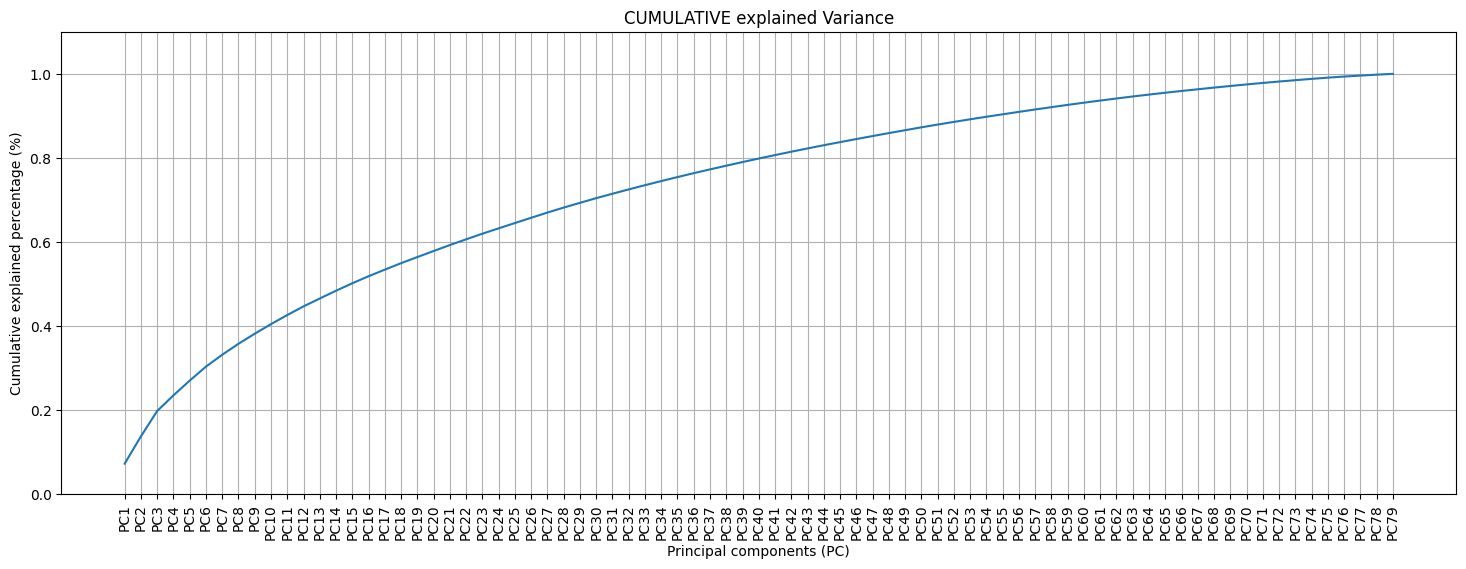

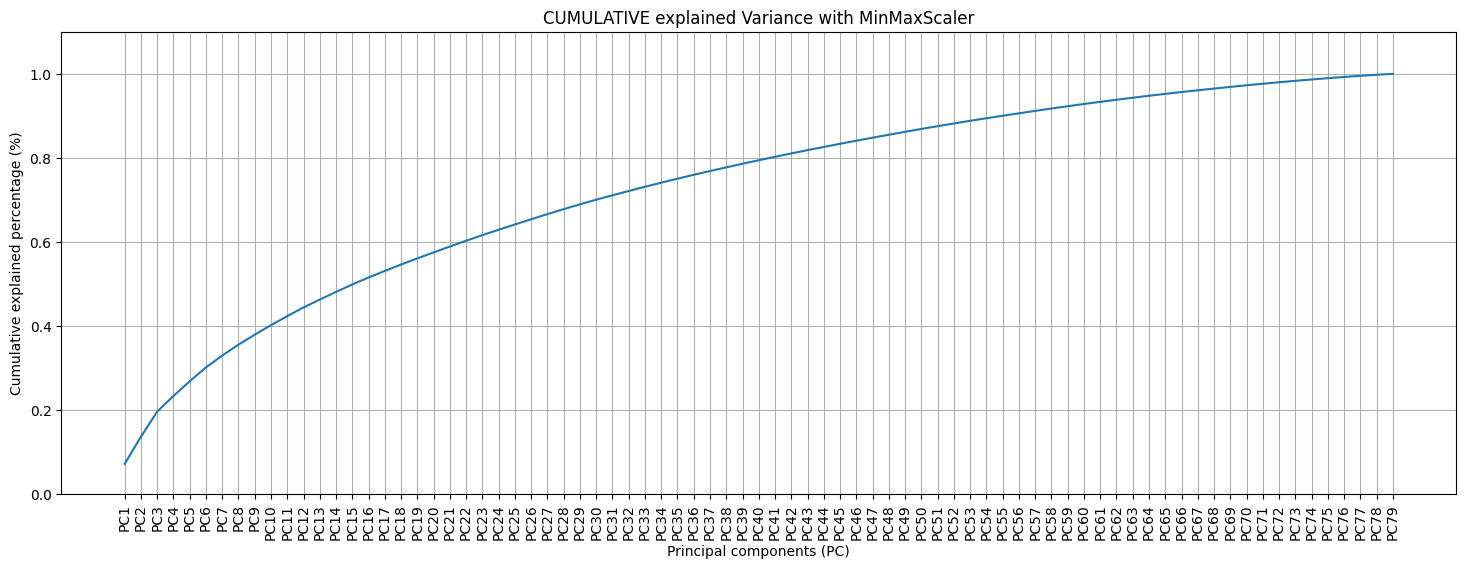

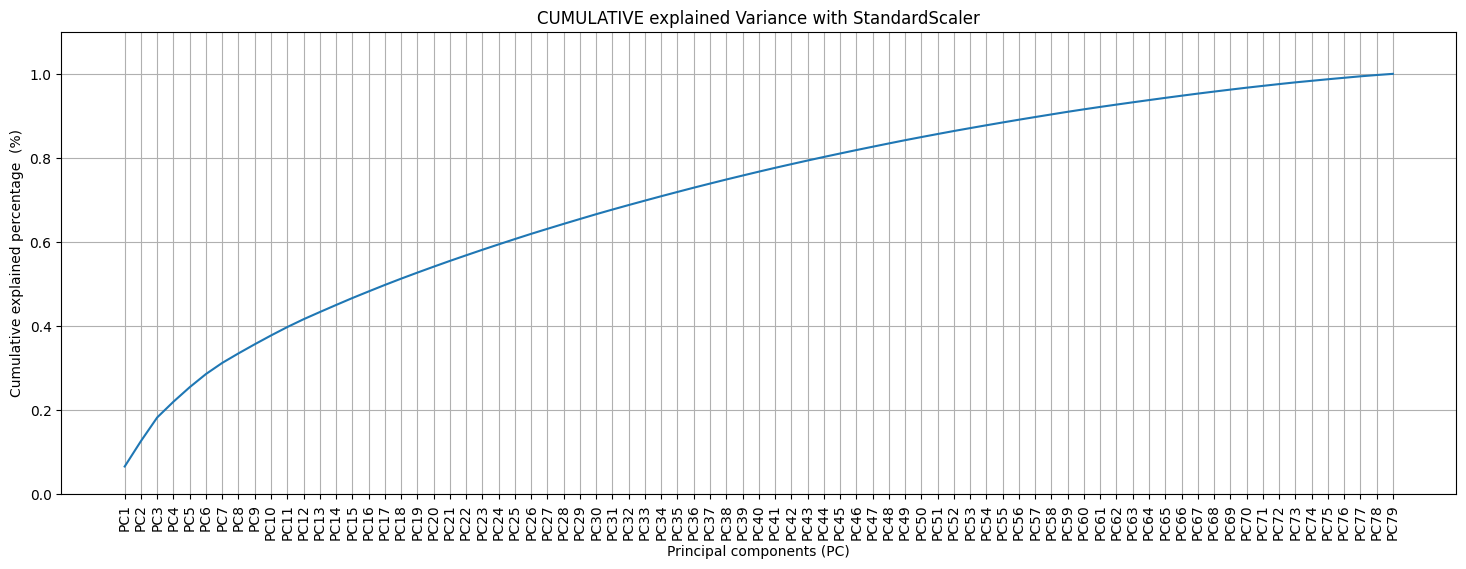

In [26]:
pca_no = PCA()
pca_no.fit(X_df)

plt.figure(figsize=(18,6))
plt.plot(np.cumsum(pca_no.explained_variance_ratio_))
plt.title('CUMULATIVE explained Variance')
plt.xticks(ticks=np.arange(pca_no.n_features_in_), labels=[f'PC{i + 1}' for i in range(pca_no.n_features_in_)], rotation = 90)
plt.ylim([0, 1.1])
plt.xlabel('Principal components (PC)')
plt.ylabel('Cumulative explained percentage (%)')
plt.grid()
plt.show()

pca_mm = PCA()
pca_mm.fit(Xmm_df)

plt.figure(figsize=(18,6))
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_))
plt.title('CUMULATIVE explained Variance with MinMaxScaler')
plt.xticks(ticks=np.arange(pca_mm.n_features_in_), labels=[f'PC{i + 1}' for i in range(pca_mm.n_features_in_)], rotation = 90)
plt.ylim([0, 1.1])
plt.xlabel('Principal components (PC)')
plt.ylabel('Cumulative explained percentage (%)')
plt.grid()
plt.show()

pca_std = PCA()
pca_std.fit(Xstd_df)

plt.figure(figsize=(18,6))
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.title('CUMULATIVE explained Variance with StandardScaler')
plt.xticks(ticks=np.arange(pca_std.n_features_in_), labels=[f'PC{i + 1}' for i in range(pca_std.n_features_in_)], rotation = 90)
plt.ylim([0, 1.1])
plt.xlabel('Principal components (PC)')
plt.ylabel('Cumulative explained percentage  (%)')
plt.grid()
plt.show()


##### Due to the high dimensionality of the data, making assumptions from raw features is challenging. To simplify the analysis, We focused on the number of principal components (PCs) needed to capture 80% of the total variance. In the non-scaled case, approximately 40 PCs were required to reach this threshold. Similarly, for the MinMax scaled data, about 41 PCs were needed, showing results quite similar to the non-scaled case. However, for the standard scaled data, it took approximately 44 PCs to achieve 80% of the variance. This suggests that standard scaling is slightly less efficient in terms of dimensionality reduction for this dataset.

## Step 3. Dimensionality Reduction and PC Interpretation

In the cells below, following operations are done:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, computed a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ should be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualized all the PCs and given a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Performed the score graph for both the cases (_std_ and _mm_). If $m>3$, ploted the score graph with respect to the first 3 PCs. All the **plots are shown the names of the PCs on the axes** for better understanding the results.

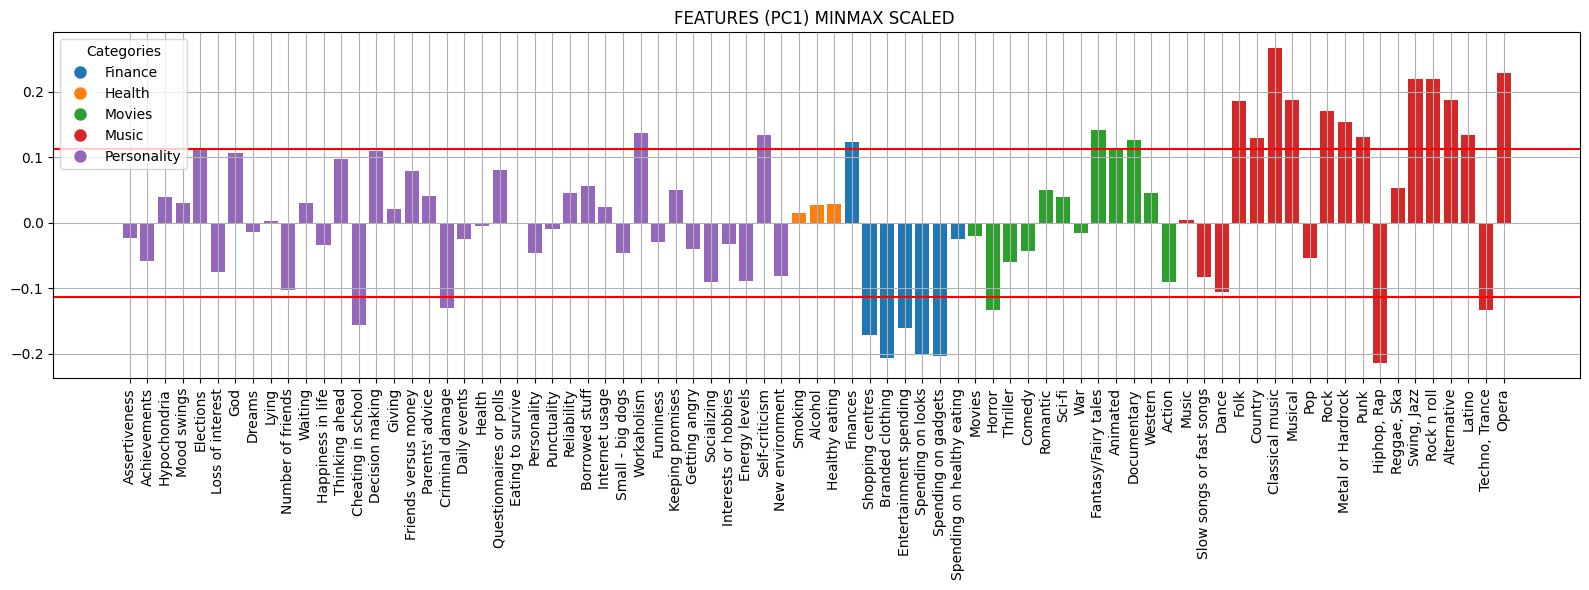

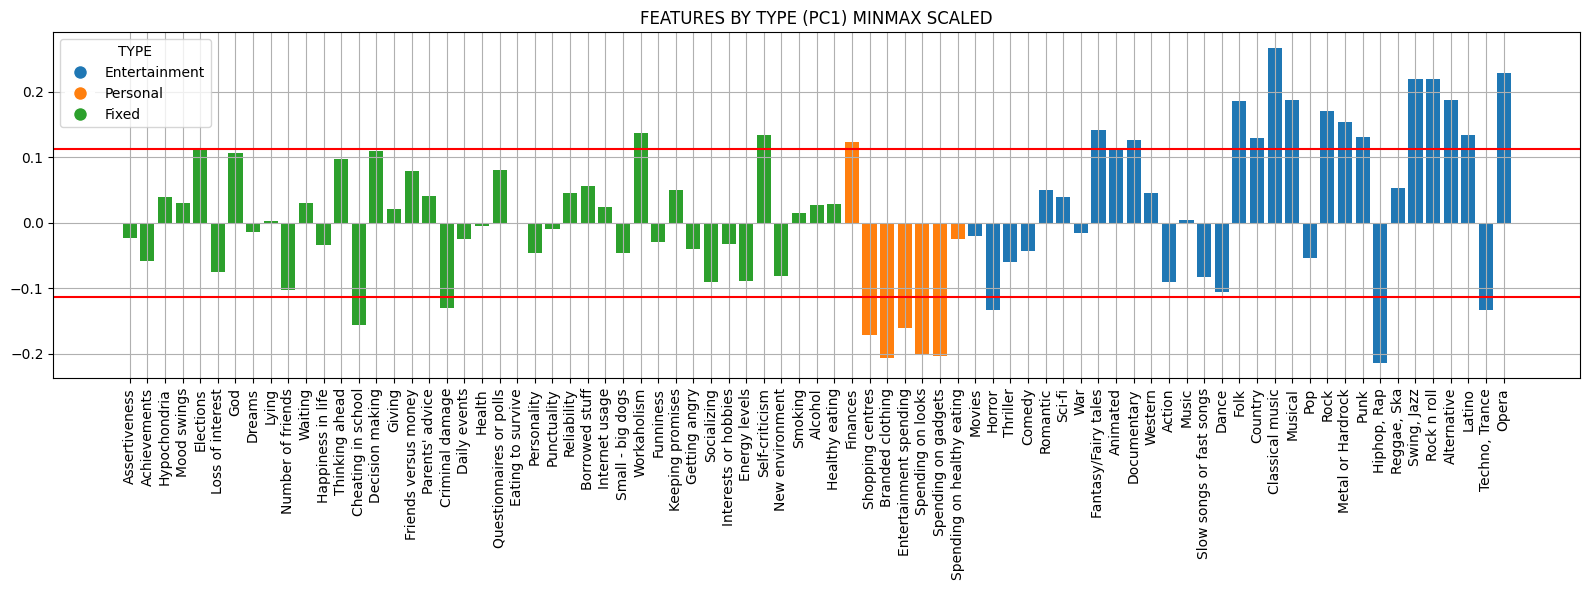

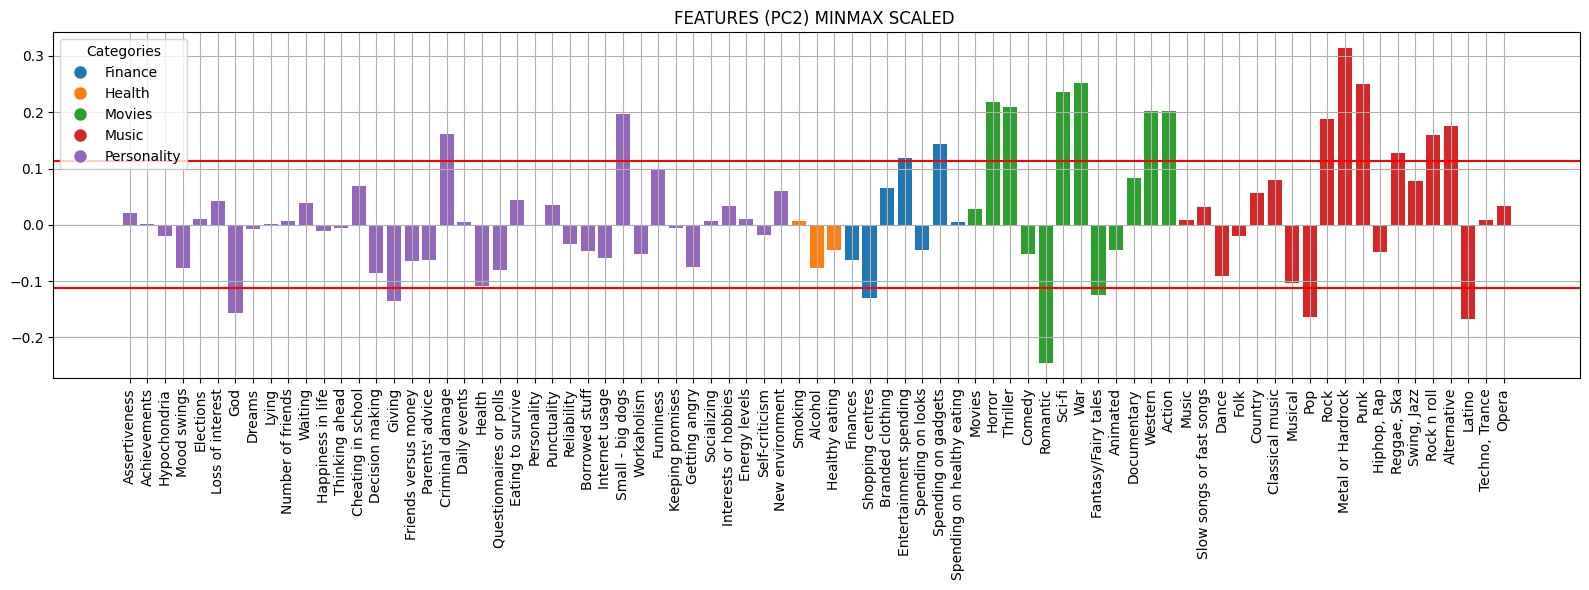

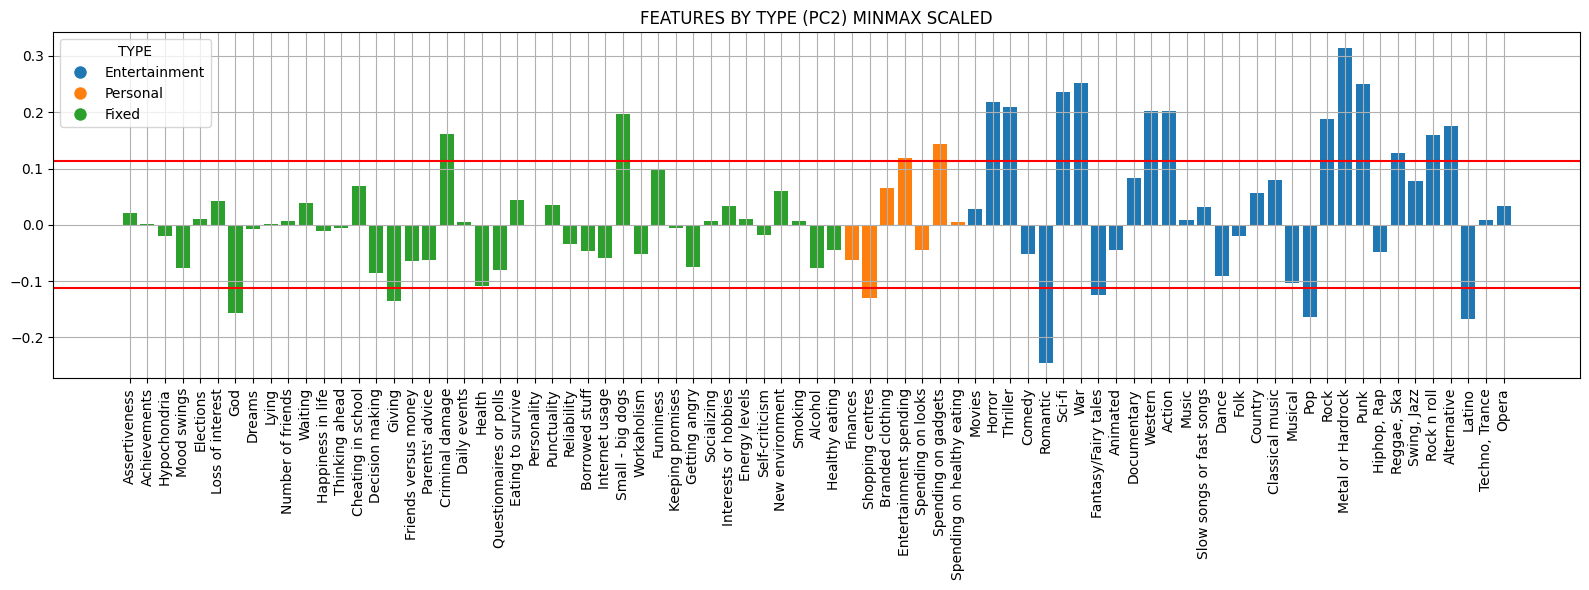

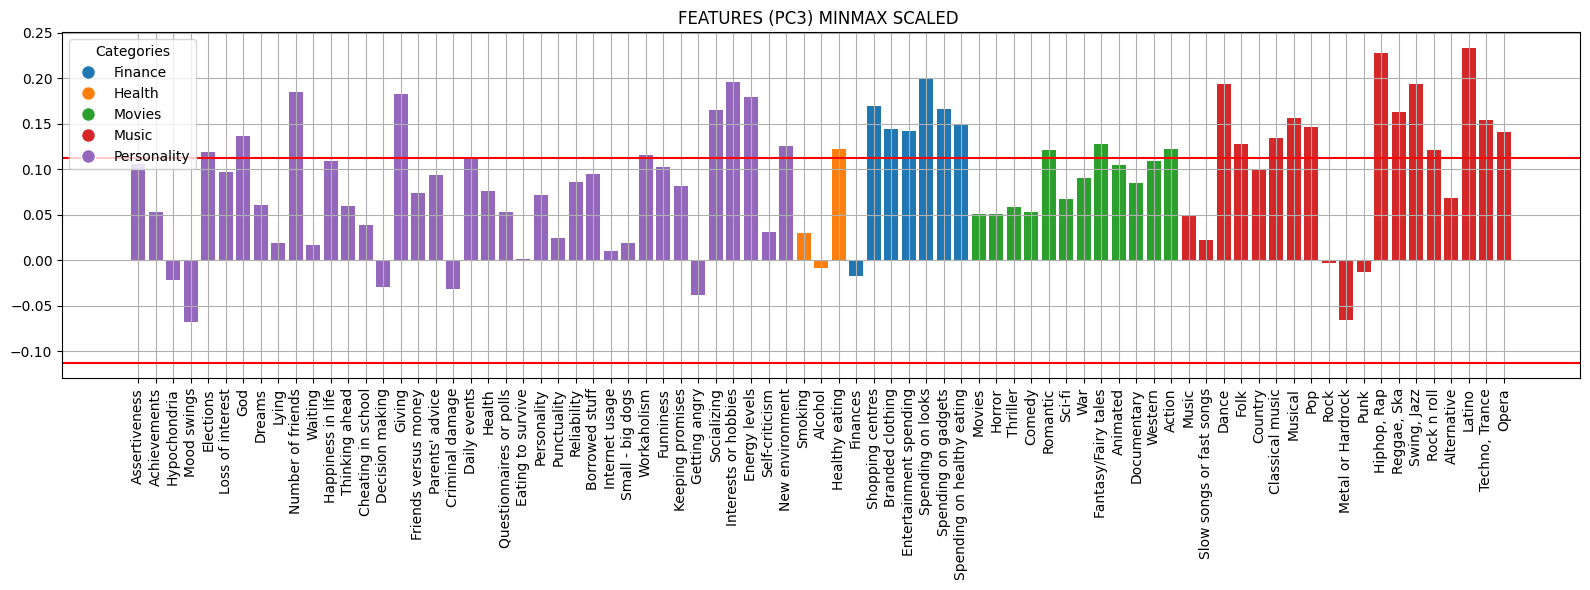

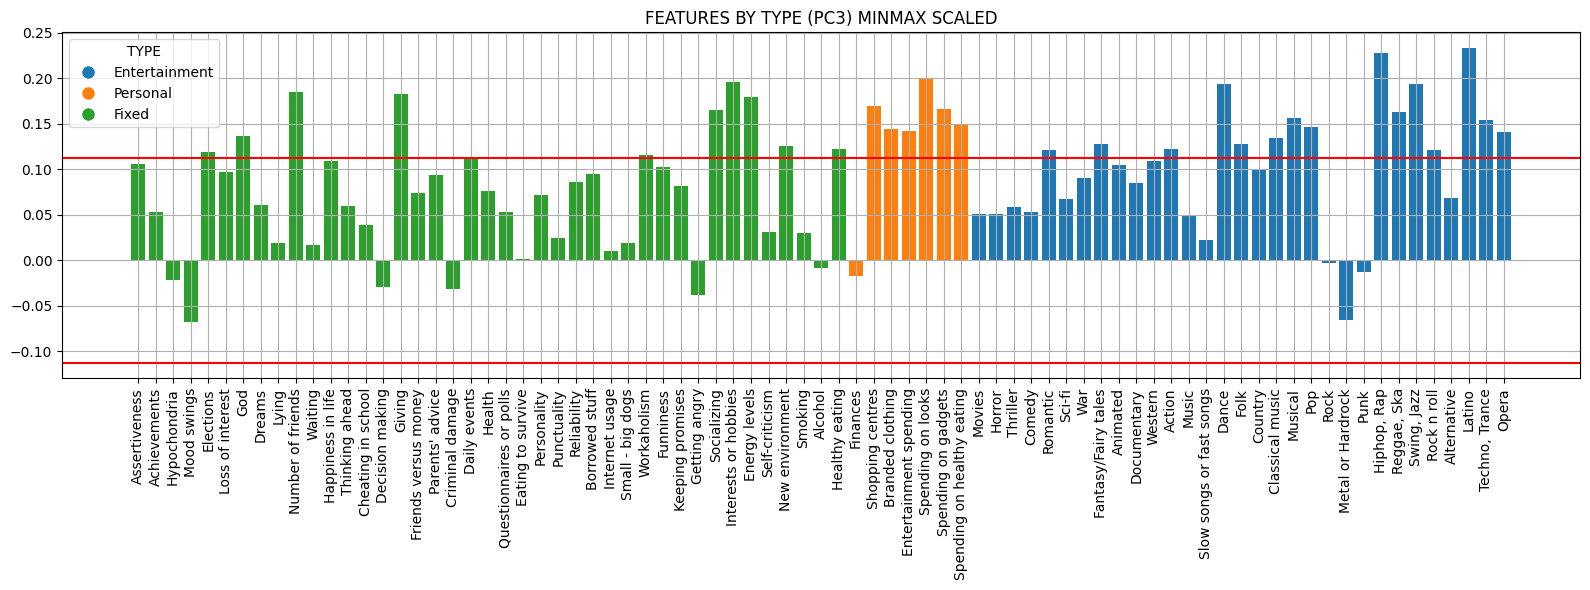

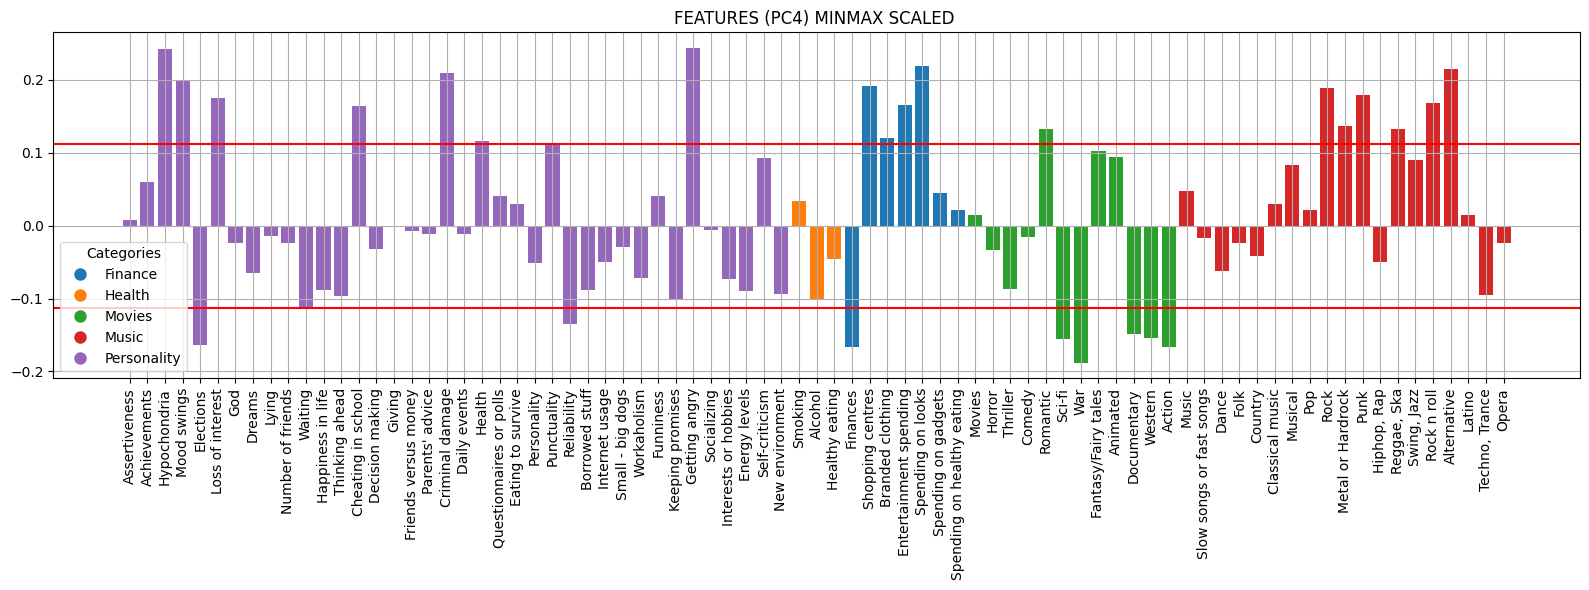

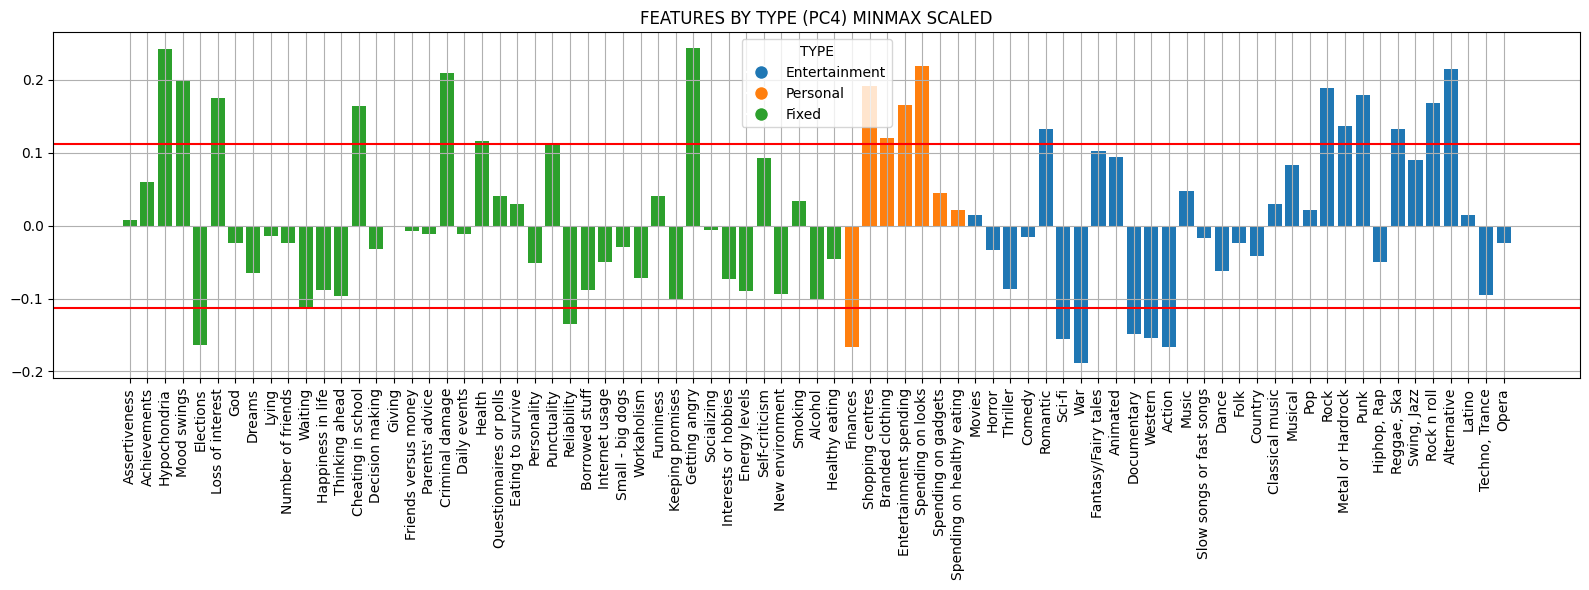

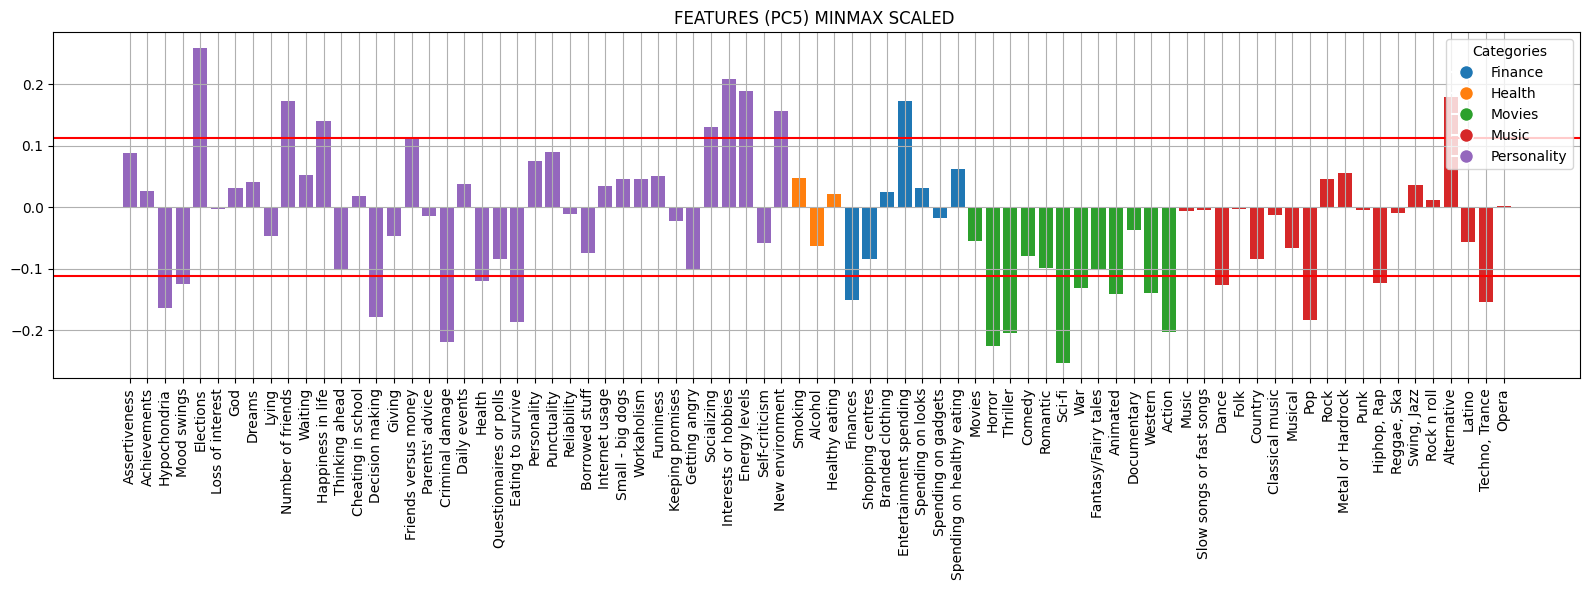

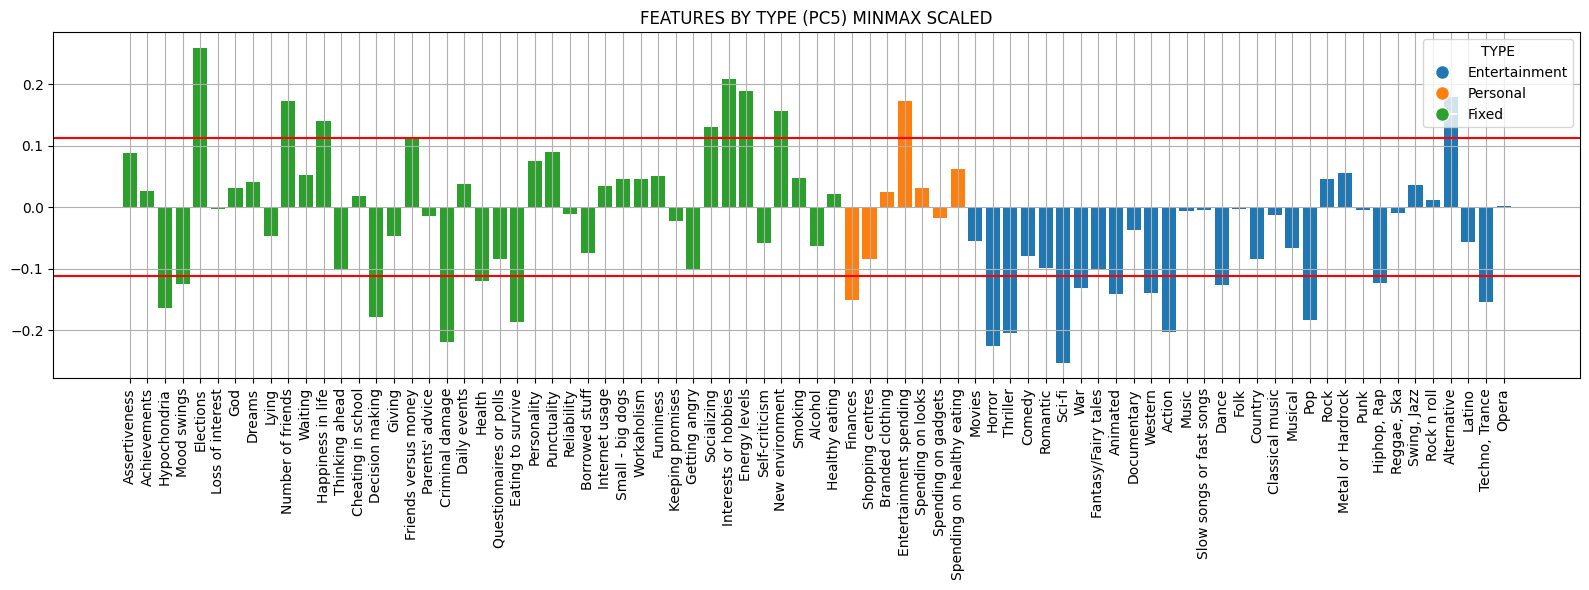

In [27]:
cumulative_variance = np.cumsum(pca_std.explained_variance_ratio_)
m_prime = np.argmax(cumulative_variance >= 0.33)+1  #to get the PCA count (1-indexed)
m_std =min(m_prime,5)
pca_std = PCA(n_components=m_std)
pca_std.fit(Xstd_df)


cumulative_variance = np.cumsum(pca_mm.explained_variance_ratio_)
m_prime = np.argmax(cumulative_variance >= 0.33)+1
m_MM =min(m_prime,5)
pca_mm = PCA(n_components=m_MM)
pca_mm.fit(Xmm_df)




# JUST TO CHECK AFTER PLOTTING
# # Top features for each PC in the Standard-Scaled dataset
# for i in range(m_std):
#     print(f"Top features for PC {i+1} (Standard-Scaled):")
#     print(sorted(zip(Xstd_df.columns, pca_std.components_[i]), key=lambda x: -abs(x[1]))[:5])
# print()
# # Top features for each PC in the Min-Max Scaled dataset
# for i in range(m_MM):
#     print(f"Top features for PC {i+1} (Min-Max Scaled):")
#     print(sorted(zip(Xmm_df.columns, pca_mm.components_[i]), key=lambda x: -abs(x[1]))[:5])


eps = np.sqrt(1/pca_mm.n_features_in_)  #threshold value


my_var = {}  # To create a color bar graph, we need to determine what features we have in our dataset. So, we created a dictionary.

for category, features in variables_by_type.items():
    for feature in features:
        if feature in X_df.columns:
            if category not in my_var:  #initializing my dictionary
                my_var[category] = []  # Initialize list for category if not already present
            my_var[category].append(feature)


category_colors = {}
colors = plt.cm.tab10.colors

# Assign colors to each category in my_var
for idx, category in enumerate(my_var.keys()):
    category_colors[category] = colors[idx % len(colors)]  #ensures that if there are more categories than colors, the palette wraps around and reuses colors cyclically.

# bar colors generation in the order of features in X_df.columns. Otherwise, the order and the label doesn't match
bar_colors = []
for feature in X_df.columns:
    for category, features in my_var.items():
        if feature in features:  # Match the feature with its category
            bar_colors.append(category_colors.get(category, 'blue'))
            break

# Group the category types into a new dictionary
new_categories_by_type = {
    'Entertainment': var_entertainment_feat_types,
    'Personal': var_personal_feat_types,
    'Fixed': fixed_feat_types,
    'Labels': label_types
}

my_var2 = {}
for category, feature_types in new_categories_by_type.items():
    for feature_type in feature_types:
        # Ensure the feature_type exists in my_var
        if feature_type in my_var:
            if category not in my_var2:
                my_var2[category] = []
            my_var2[category].extend(my_var[feature_type])

category_colors2 = {}
colors = plt.cm.tab10.colors

for idx, category in enumerate(my_var2.keys()):
    category_colors2[category] = colors[idx % len(colors)]

bar_colors2 = []
for feature in X_df.columns:
    for category, features in my_var2.items():
        if feature in features:  # Matching the feature with its category
            bar_colors2.append(category_colors2.get(category, 'blue'))
            break


for ii in range(m_MM):
    plt.figure(figsize=(16,6))
    plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[ii,:],color=bar_colors)

    # threshold horizontal lines [-eps, eps]
    plt.axhline(y=eps, color='red', linestyle='-')
    plt.axhline(y=-eps, color='red', linestyle='-')

    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), labels=Xmm_df.columns, rotation = 90)
    plt.title(f"FEATURES (PC{ii+1}) MINMAX SCALED ")

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                          markersize=10, label=category) for category, color in category_colors.items()]

    plt.legend(handles=handles, title="Categories")
    plt.grid()
    plt.tight_layout()
    plt.show()


    #------------------------------------------------------------------------

    plt.figure(figsize=(16, 6))
    plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[ii, :],color=bar_colors2)

    plt.axhline(y=eps, color='red', linestyle='-')
    plt.axhline(y=-eps, color='red', linestyle='-')

    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), labels=Xmm_df.columns, rotation=90)

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                          markersize=10, label=category) for category, color in category_colors2.items()]
    plt.legend(handles=handles, title="TYPE")
    plt.title(f"FEATURES BY TYPE (PC{ii+1}) MINMAX SCALED")
    plt.grid()
    plt.tight_layout()
    plt.show()

##### For the 1st PC analysis it can be seen that for the positive axis we could represent a preference for refined tastes in music and lifestyle genres and cultural activities like folk, classical music etc.. On the negative axis, it likely reflects consumer-driven, modern lifetsyle such as spending behaviours in general while being drawn to music genres like Hip hop and Rap that often speak about wealth, and status.
##### 2nd PCA focuses on more high-adrenalin, intense features like metal or hard rock for the music and horror, sci-fi, war for the movie category for the positive axis and negative axis would be more soft features like romantic, pop and latino.
##### 3rd PCA represents nothing for the negative axis, for the positive one, the features like socializing, having friends, giving gifts at christmas and interest or hobbies become prominents.
##### 4th PCA represents individuals who are more likely to experience emotional mess, have a rebellious attitude like mood swings, getting angry etc. the negative axis is more about disciplined, and practical approach to life such as elections, and finance.
##### 5th PCA focuses on more social features for (+) and more depressive things for the negative axis

In [28]:
PC_names_mm = ['PCA 1 Cultural action  and Tradition (+) and Consumerism and Materialism(-)',
             'PCA 2 Intensity and Adventurousness(+) and Romanticism (-)',
             'PCA 3 Social dynamism(+)',
             'PCA 4 Emotional instability (+) responsible personalities(-)',
             'PCA 5 Energy, and Adaptability(+) and introverted(-)']

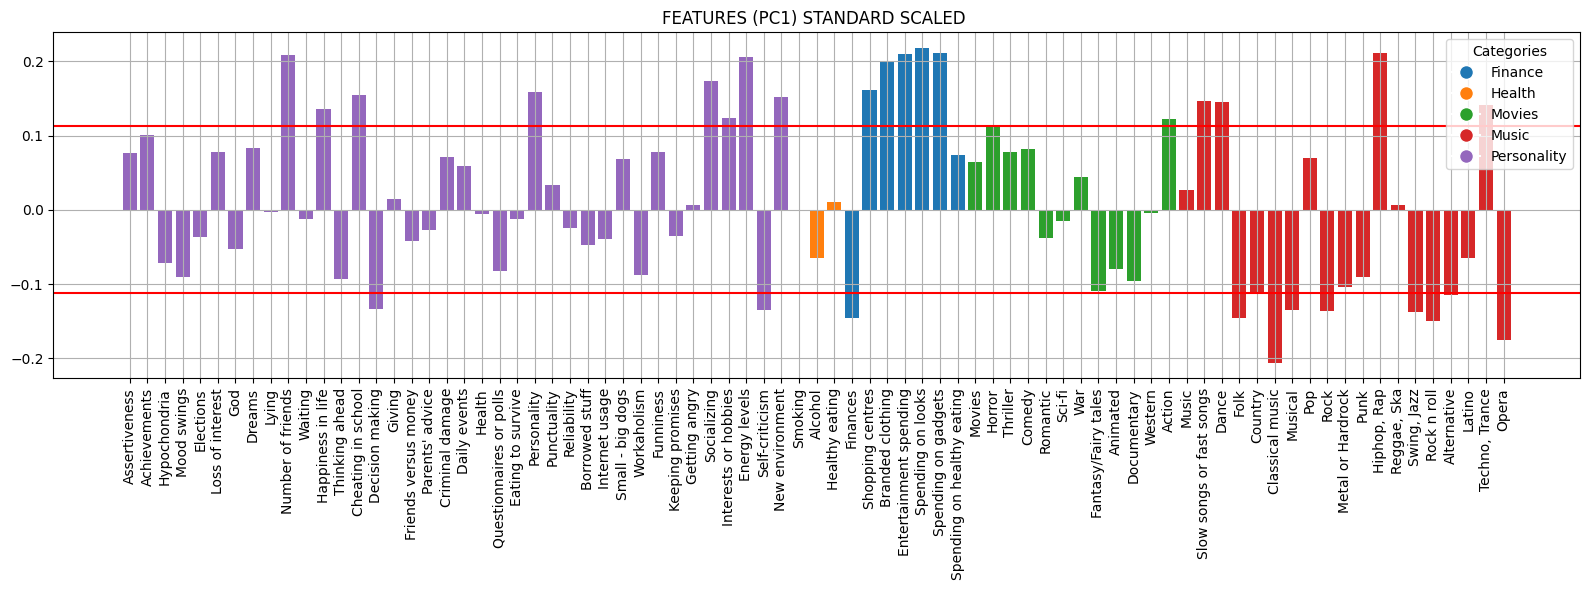

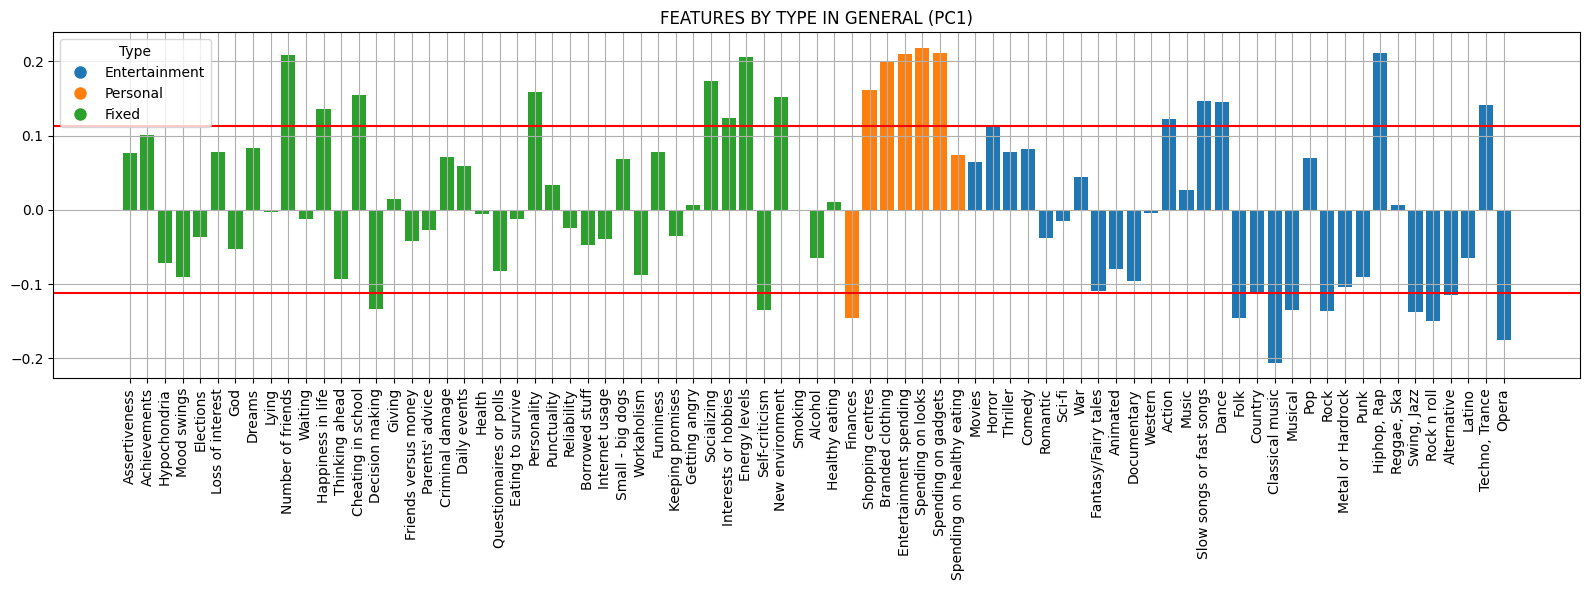

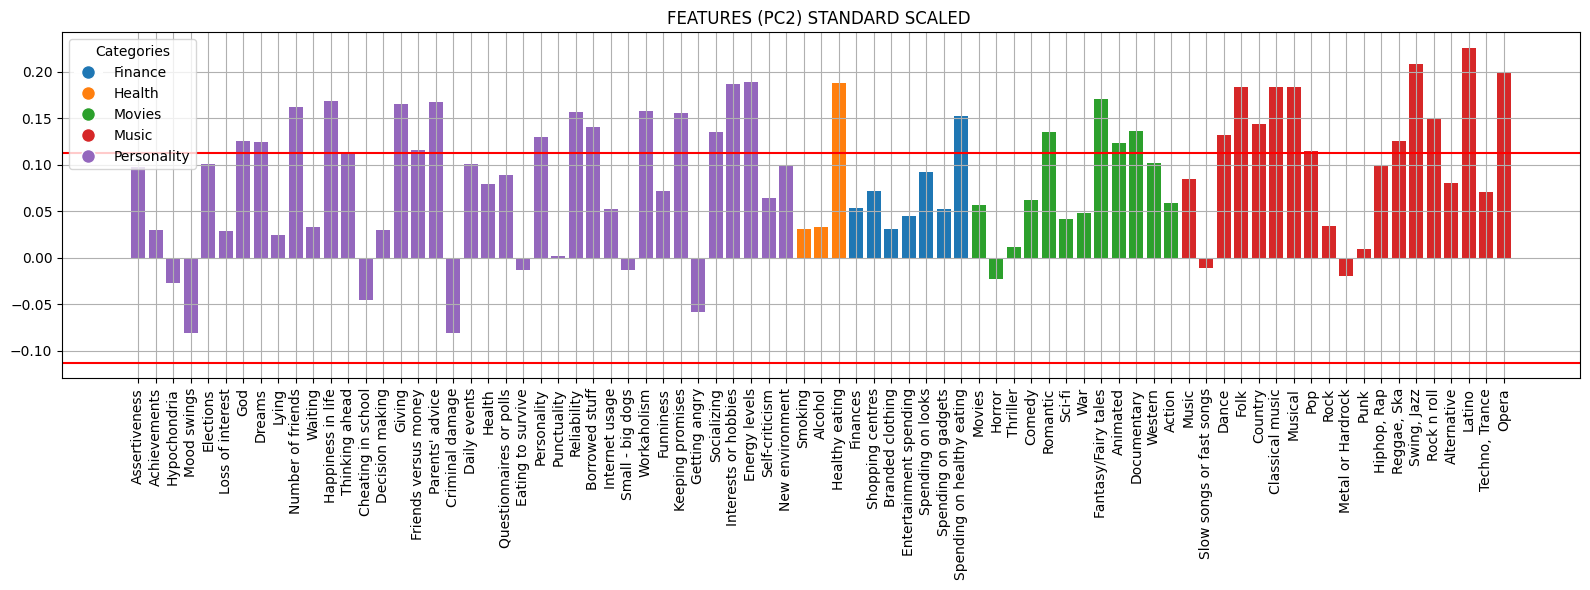

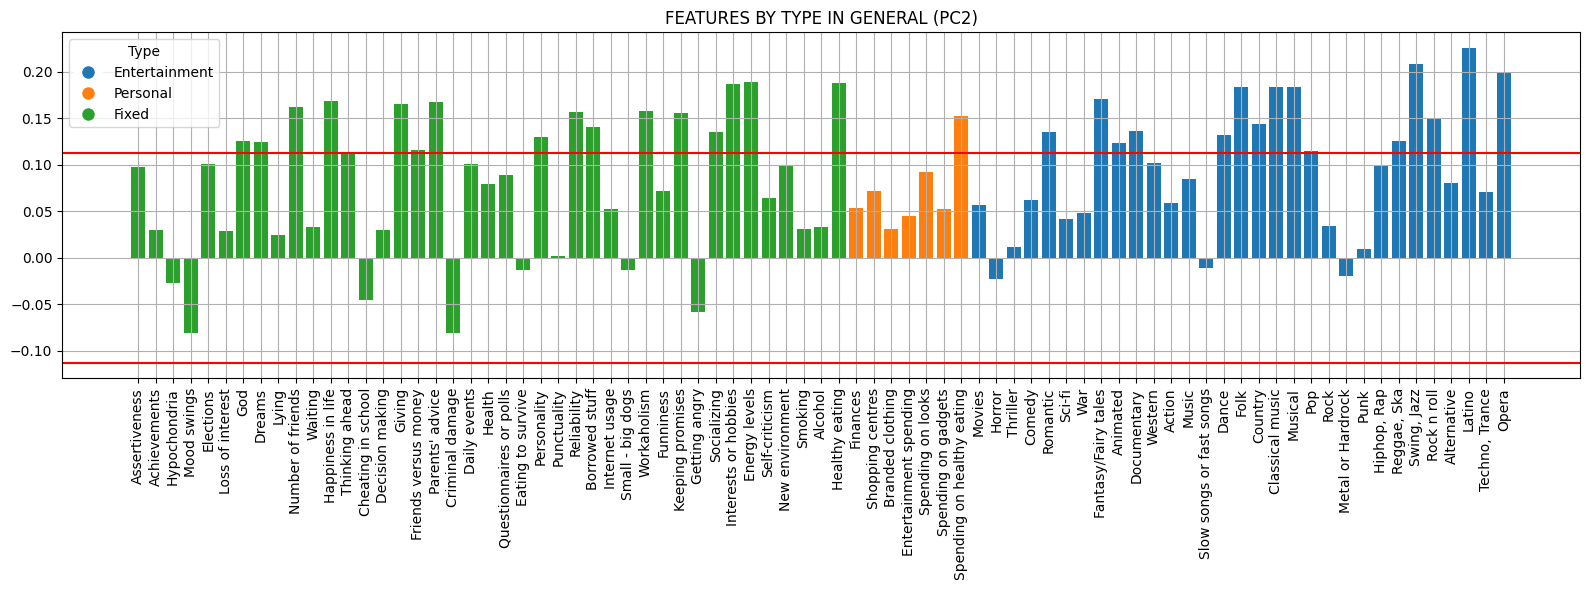

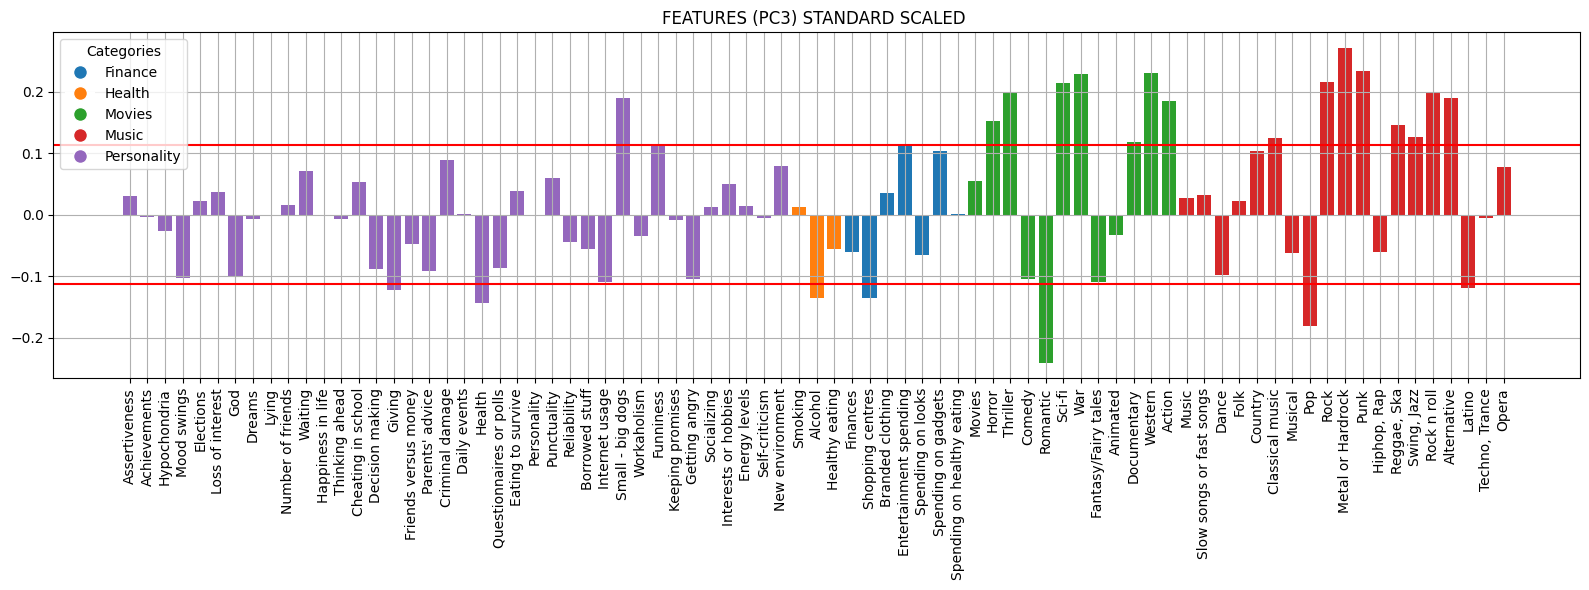

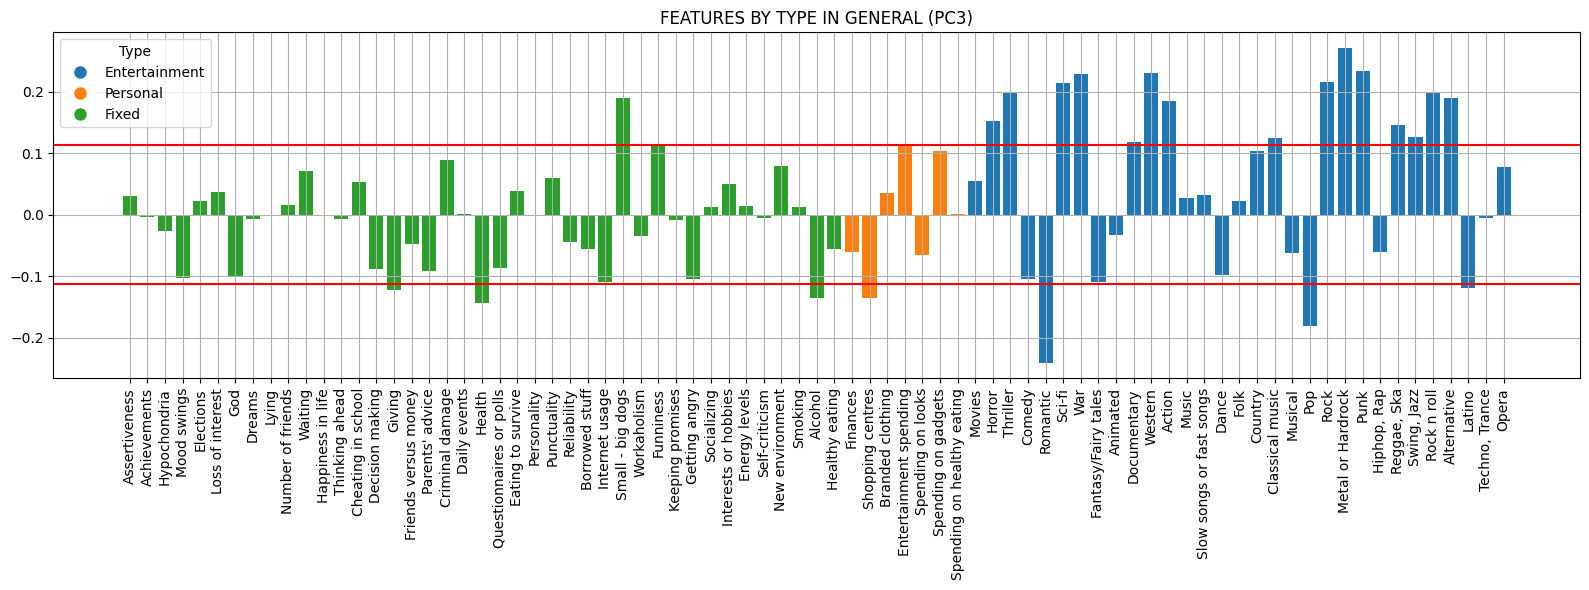

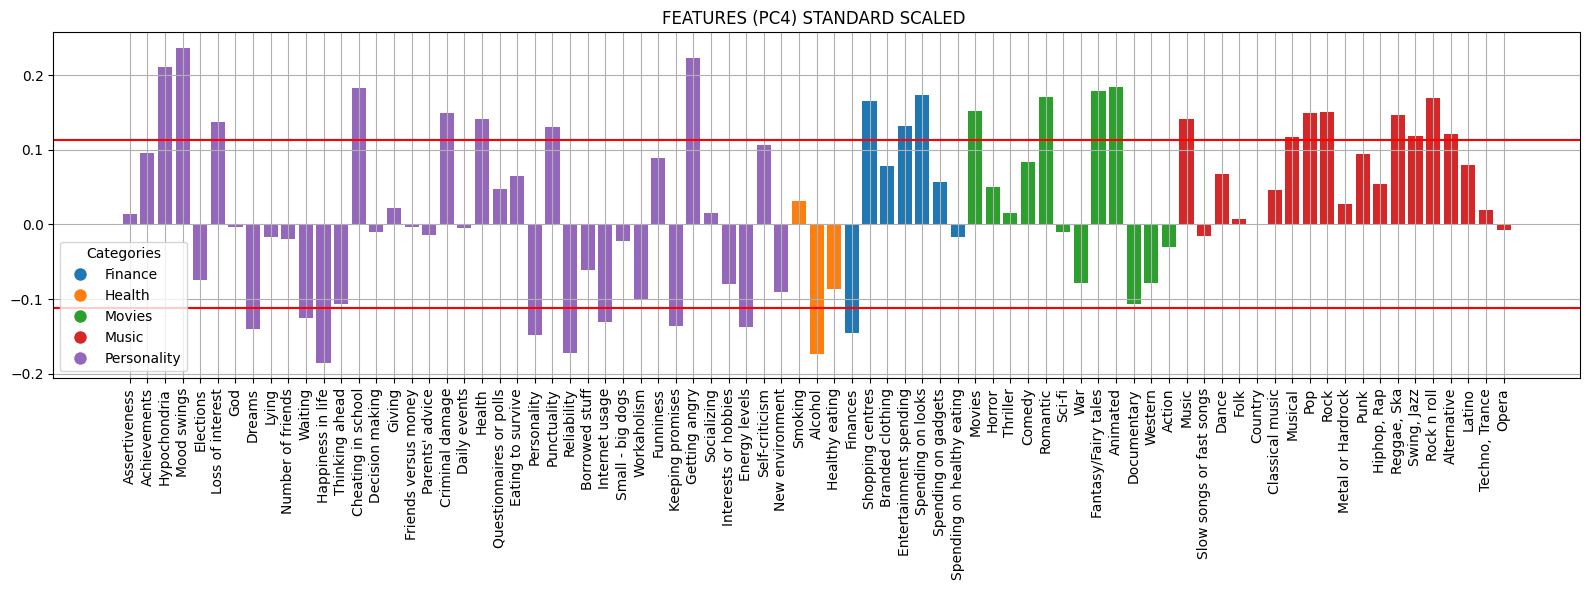

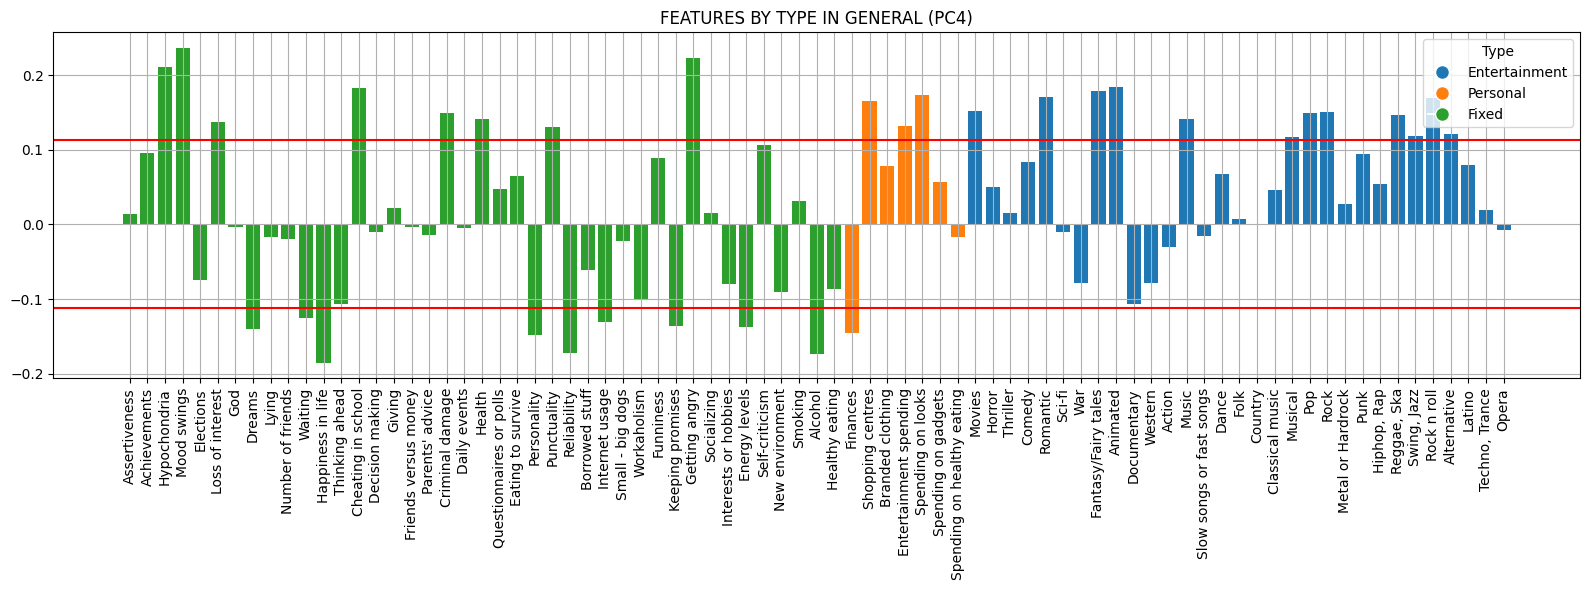

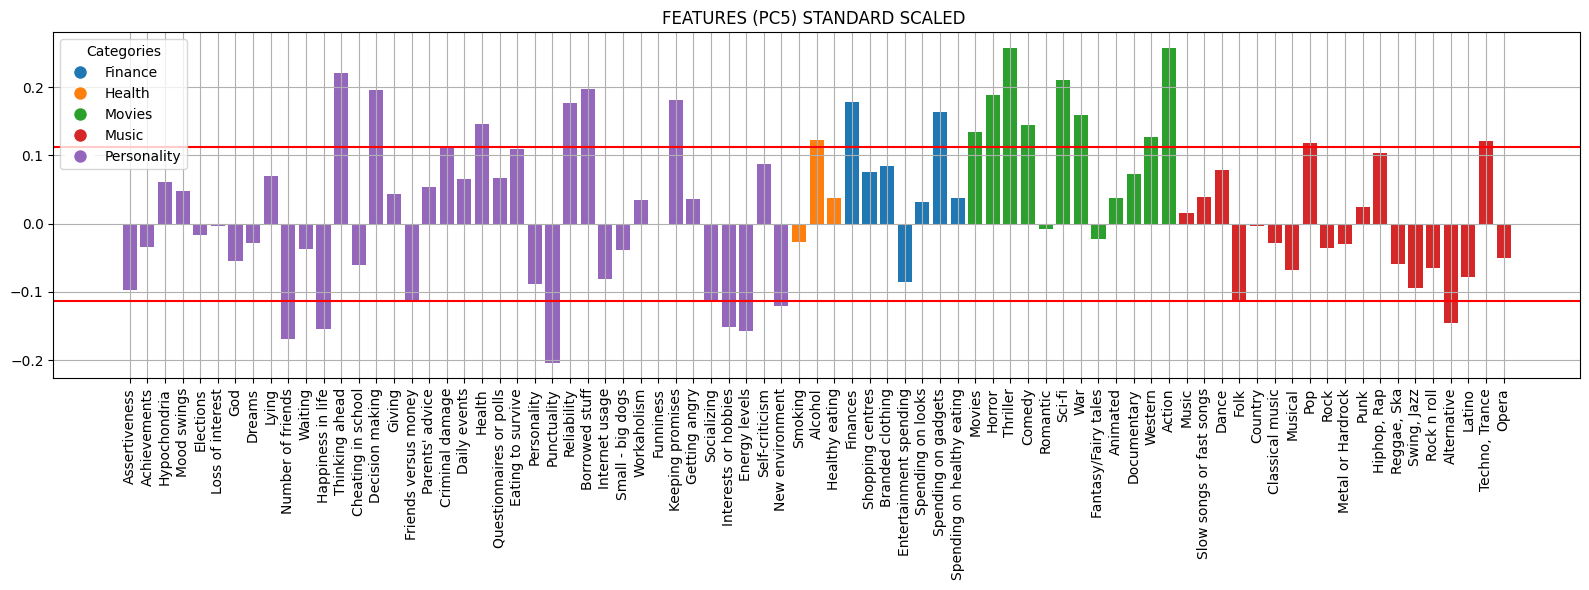

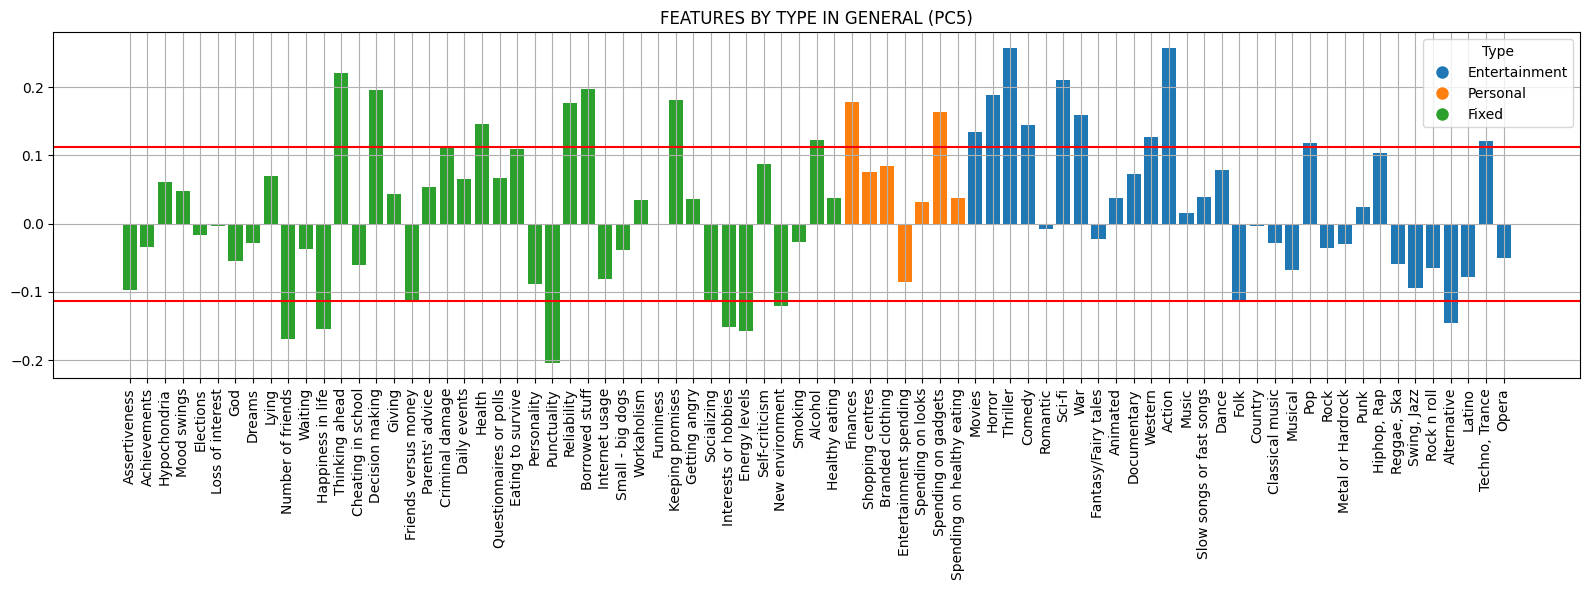

In [29]:
for ii in range(m_std):

    plt.figure(figsize=(16,6))
    plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[ii,:],color=bar_colors)

    plt.axhline(y=eps, color='red', linestyle='-')
    plt.axhline(y=-eps, color='red', linestyle='-')

    plt.xticks(ticks=np.arange(pca_std.n_features_in_),labels=Xstd_df.columns,rotation = 90)


    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                          markersize=10, label=category) for category, color in category_colors.items()]
    plt.title(f"FEATURES (PC{ii+1}) STANDARD SCALED ")
    plt.legend(handles=handles, title="Categories")
    plt.tight_layout()
    plt.grid()
    plt.show()

    #-------------------------------------- FOR TYPE -------------------------------------
    plt.figure(figsize=(16, 6))
    plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[ii, :],color=bar_colors2)

    plt.axhline(y=eps, color='red', linestyle='-')
    plt.axhline(y=-eps, color='red', linestyle='-')

    plt.xticks(ticks=np.arange(pca_std.n_features_in_), labels=Xstd_df.columns, rotation=90)


    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                          markersize=10, label=category) for category, color in category_colors2.items()]

    plt.title(f"FEATURES BY TYPE IN GENERAL (PC{ii+1})")
    plt.legend(handles=handles, title="Type")
    plt.tight_layout()
    plt.grid()
    plt.show()


##### PCA 1: the positive axis focuses on more dynamic features and spending such as socializing, energy levels etc. for the negative one, it can be said that mature and self critical features like decision making and finances are more important for this axis.
##### PCA 2: it can be analysed that this PC represents more beliefs and kind behaviours and nothing can be added for the negative axis
##### PCA 3: for the positive axis, one can  say that the dog type that one adapt is highly correlated with the life-style and for the nagetive one romanticism is the thing that draw more attention.
##### PCA 4: positive axis represent unkind behaviours like in one of the PC analyses for minmax scaling. for the negative axis same thing can be said the same thing, ultimately.
##### PCA 5: features like thinking ahead and decision making may show that it is about critical thinking. for the negative axis, it might be related to socail features like hobbies, happiness

In [30]:
PC_names_std = ['PCA 1 high energy lifestyle (+) and Cautiousness(-)',
                'PCA 2 values and well-being(+)',
                'PCA 3 dog type(+) and romantism (-)',
                'PCA 4 Emotional Reactivity(+) and Personal Well-being(-)',
                'PCA 5 strategic thinking(+) and emotional satisfaction(-)'
                ]

### SCORE GRAPH

*************************
Analyzing: [nan, 'male', 'female']
*************************


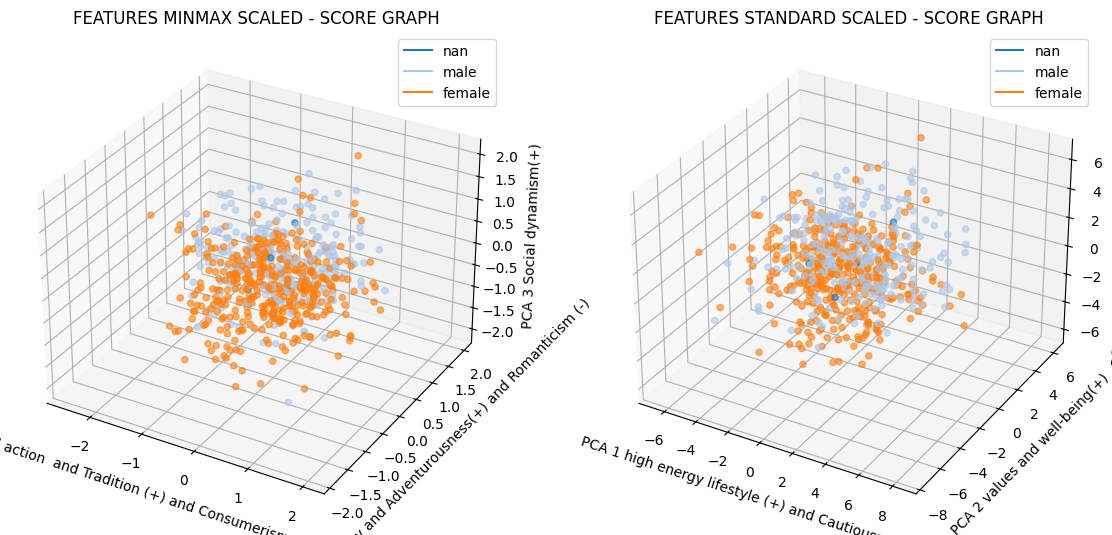

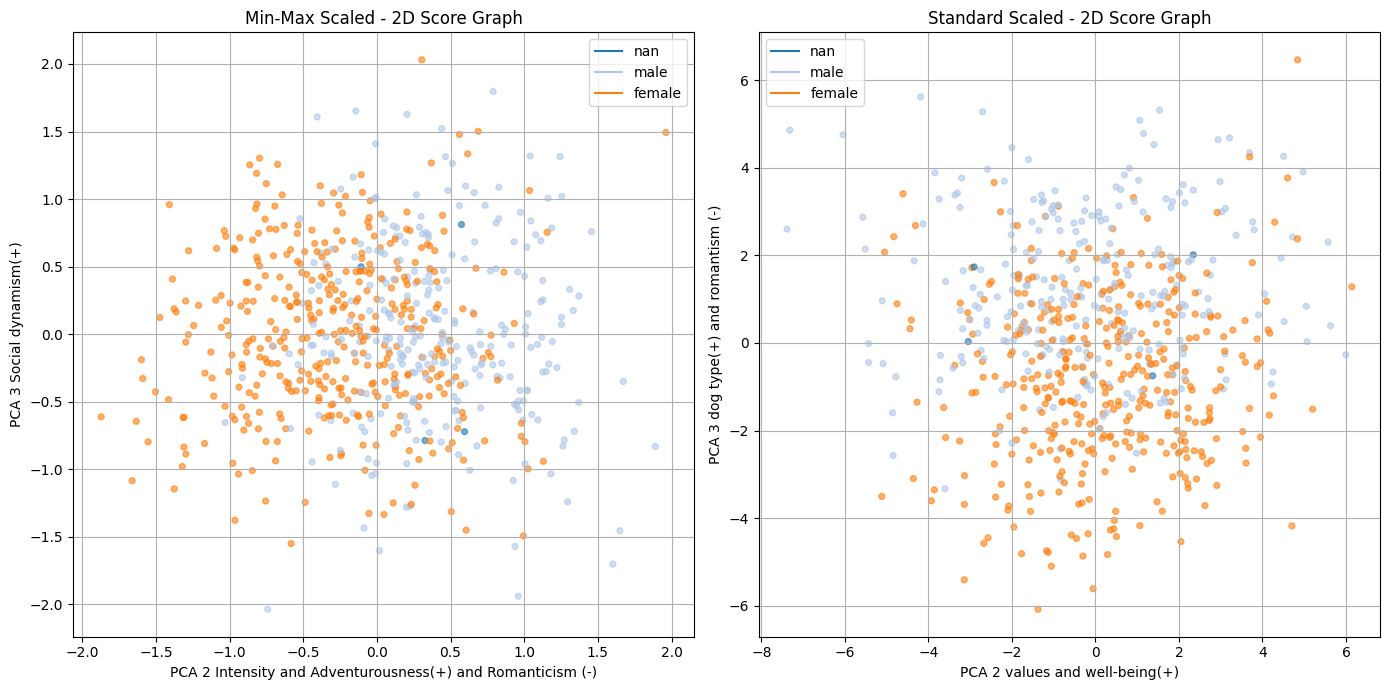

In [31]:
set1 = cm.tab20.colors

analyze = df['Gender'].unique()   #According to Demographic labels and specifications 'Gender' can be changed with various options


print('*************************')
print(f'Analyzing: {list(analyze)}')
print('*************************')



Xa_df = pca_mm.transform(Xmm_df)
Xb_df = pca_std.transform(Xstd_df)

# {'category': color}
analyze_colors = {analyze[i]:set1[i] for i in range(len(analyze))}
Xmm_df['color'] = [analyze_colors[t] for t in df['Gender'].values]    #If you change 'Gender' don't forgat to change it here also!
analyze_colors_legend = [Line2D([0], [0], color=analyze_colors[k]) for k in analyze_colors.keys()] # custom legend for colors


# ---------------------- MINMAX SCALER ----------------------
# -------- 3D SCORE GRAPH --------
plot_3d = plt.figure(figsize=(14, 7))
axis_3d = plot_3d.add_subplot(121, projection='3d')
axis_3d.scatter(Xa_df[:, 0], Xa_df[:, 1], Xa_df[:, 2], s=20 , c=Xmm_df['color'].values ,alpha=0.60)
axis_3d.set_xlabel(PC_names_mm[0])
axis_3d.set_ylabel(PC_names_mm[1])
axis_3d.set_zlabel(PC_names_mm[2])
plt.title('FEATURES MINMAX SCALED - SCORE GRAPH')
plt.legend(analyze_colors_legend, [k for k in analyze_colors.keys()])
plt.grid()

# ---------------------- STANDARD SCALER ----------------------
# -------- 3D SCORE GRAPH --------
axis_3d = plot_3d.add_subplot(122, projection='3d')
axis_3d.scatter(Xb_df[:, 0], Xb_df[:, 1], Xb_df[:, 2], s=20 , c=Xmm_df['color'].values ,alpha=0.60)
axis_3d.set_xlabel(PC_names_std[0])
axis_3d.set_ylabel(PC_names_std[1])
axis_3d.set_zlabel(PC_names_std[2])
plt.title('FEATURES STANDARD SCALED - SCORE GRAPH')
plt.legend(analyze_colors_legend, [k for k in analyze_colors.keys()])
plt.grid()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# ---------------------- MINMAX SCALER ----------------------
# 2D SCORE GRAPH
axes[0].scatter(Xa_df[:, 1], Xa_df[:, 2], s=18, c=Xmm_df['color'].values, alpha=0.60)
axes[0].set_xlabel(PC_names_mm[1])
axes[0].set_ylabel(PC_names_mm[2])
axes[0].set_title('Min-Max Scaled - 2D Score Graph')
axes[0].grid()
axes[0].legend(analyze_colors_legend, [k for k in analyze_colors.keys()], loc='best')

# ---------------------- STANDARD SCALER ----------------------
# 2D SCORE GRAPH
axes[1].scatter(Xb_df[:, 1], Xb_df[:, 2], s=18, c=Xmm_df['color'].values, alpha=0.60)
axes[1].set_xlabel(PC_names_std[1])
axes[1].set_ylabel(PC_names_std[2])
axes[1].set_title('Standard Scaled - 2D Score Graph')
axes[1].grid()
axes[1].legend(analyze_colors_legend, [k for k in analyze_colors.keys()], loc='best')
plt.tight_layout()
plt.show()

## Exercise 4. $k$-Means

In the cells below, following operations are done:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **silohuette score is used for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Ploted the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **given a name/interpretation to them**, exploiting the names assigned to the PCs. 

In [32]:
k_list = list(np.arange(3, 11))
sil_list = []
listof_kmeans = []

# ----------------------- MINMAX --------------------
for i in range(len(k_list)):
    listof_kmeans.append(KMeans(n_clusters=k_list[i],n_init=3, random_state=random_seed))
    km_mm = listof_kmeans[i]
    km_mm.fit(Xa_df)
    sil_list.append(silhouette_score(Xa_df,km_mm.labels_))

# THE BEST VALUE OF k AND THE BEST KMeans OBJECT
best_index = np.argmax(sil_list)
best_k_mm = k_list[best_index]
km_mm = listof_kmeans[best_index]

print(f'BEST SILHOUETTE SCORE FOR MINMAX SCALING: {np.max(sil_list)} --> k = {best_k_mm}')
print('--------------------------------------------------------------')
print()

k_list = list(np.arange(3, 11))
sil_list = []
listof_kmeans = []

# ----------------------- STANDARD --------------------
for i in range(len(k_list)):
    listof_kmeans.append(KMeans(n_clusters=k_list[i],n_init=5, random_state=random_seed))
    km_std = listof_kmeans[i]
    km_std.fit(Xb_df)
    sil_list.append(silhouette_score(Xb_df,km_std.labels_))

# THE BEST VALUE OF k AND THE BEST KMeans OBJECT
best_index = np.argmax(sil_list)
best_k_std = k_list[best_index]
km_std = listof_kmeans[best_index]

print()
print(f'BEST SILHOUETTE SCORE FOR STANDARD SCALING: {np.max(sil_list)} --> k = {best_k_std}')
print('--------------------------------------------------------------')


BEST SILHOUETTE SCORE FOR MINMAX SCALING: 0.1612379792834177 --> k = 4
--------------------------------------------------------------


BEST SILHOUETTE SCORE FOR STANDARD SCALING: 0.15772643149859175 --> k = 4
--------------------------------------------------------------


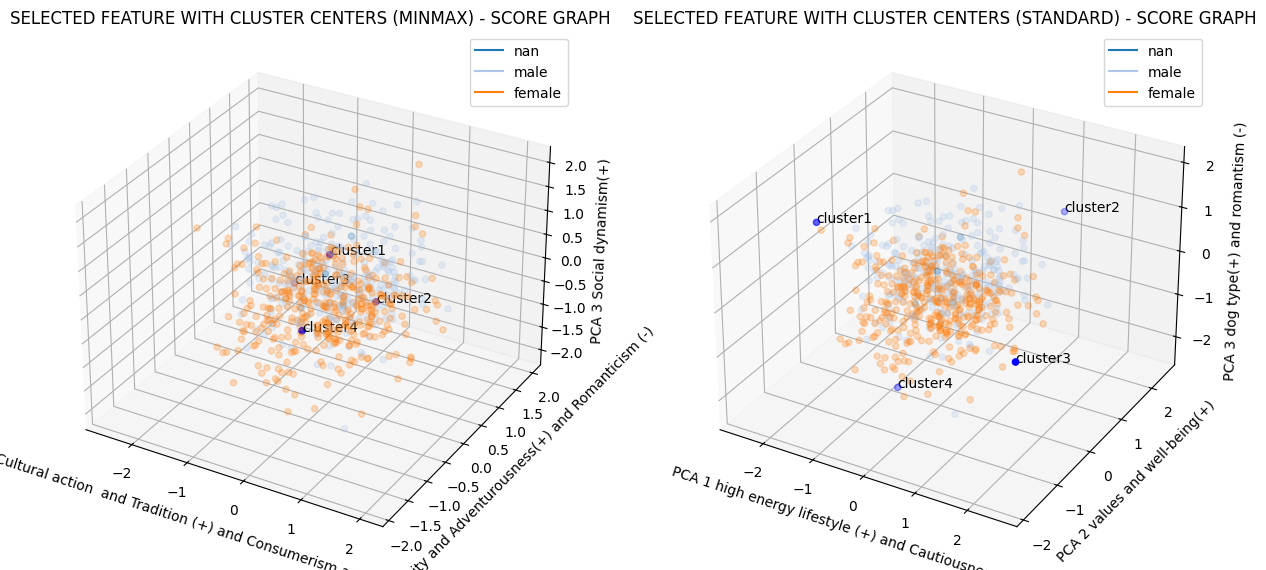

In [33]:
# -------- 3D score graph(MINMAX) with the CENTROIDS --------
fig_km_3d = plt.figure(figsize=(15, 8))
axis_km_3d = fig_km_3d.add_subplot(121, projection='3d')
axis_km_3d.scatter(Xa_df[:, 0], Xa_df[:, 1], Xa_df[:, 2], s=20, c=Xmm_df['color'].values, alpha=0.25)
axis_km_3d.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], km_mm.cluster_centers_[:, 2], c='blue')

# writing clusters' indices in the plot
for ii in range(best_k_mm):
    axis_km_3d.text(km_mm.cluster_centers_[ii, 0], km_mm.cluster_centers_[ii, 1], km_mm.cluster_centers_[ii, 2], f'cluster{ii + 1}')

axis_km_3d.set_xlabel(PC_names_mm[0])
axis_km_3d.set_ylabel(PC_names_mm[1])
axis_km_3d.set_zlabel(PC_names_mm[2])
plt.title('SELECTED FEATURE WITH CLUSTER CENTERS (MINMAX) - SCORE GRAPH' )
plt.legend(analyze_colors_legend, [k for k in analyze_colors.keys()])
plt.grid()

# -------- 3D score graph(STANDARD) with the CENTROIDS --------
axis_km_3d = fig_km_3d.add_subplot(122, projection='3d')
axis_km_3d.scatter(Xa_df[:, 0], Xa_df[:, 1], Xa_df[:, 2], s=20, c=Xmm_df['color'].values, alpha=0.25)
axis_km_3d.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='blue')

# writing clusters' indices in the plot
for ii in range(best_k_std):
    axis_km_3d.text(km_std.cluster_centers_[ii, 0], km_std.cluster_centers_[ii, 1], km_std.cluster_centers_[ii, 2], f'cluster{ii + 1}')

axis_km_3d.set_xlabel(PC_names_std[0])
axis_km_3d.set_ylabel(PC_names_std[1])
axis_km_3d.set_zlabel(PC_names_std[2])
plt.title('SELECTED FEATURE WITH CLUSTER CENTERS (STANDARD) - SCORE GRAPH' )
plt.legend(analyze_colors_legend, [k for k in analyze_colors.keys()])
plt.grid()


plt.show()

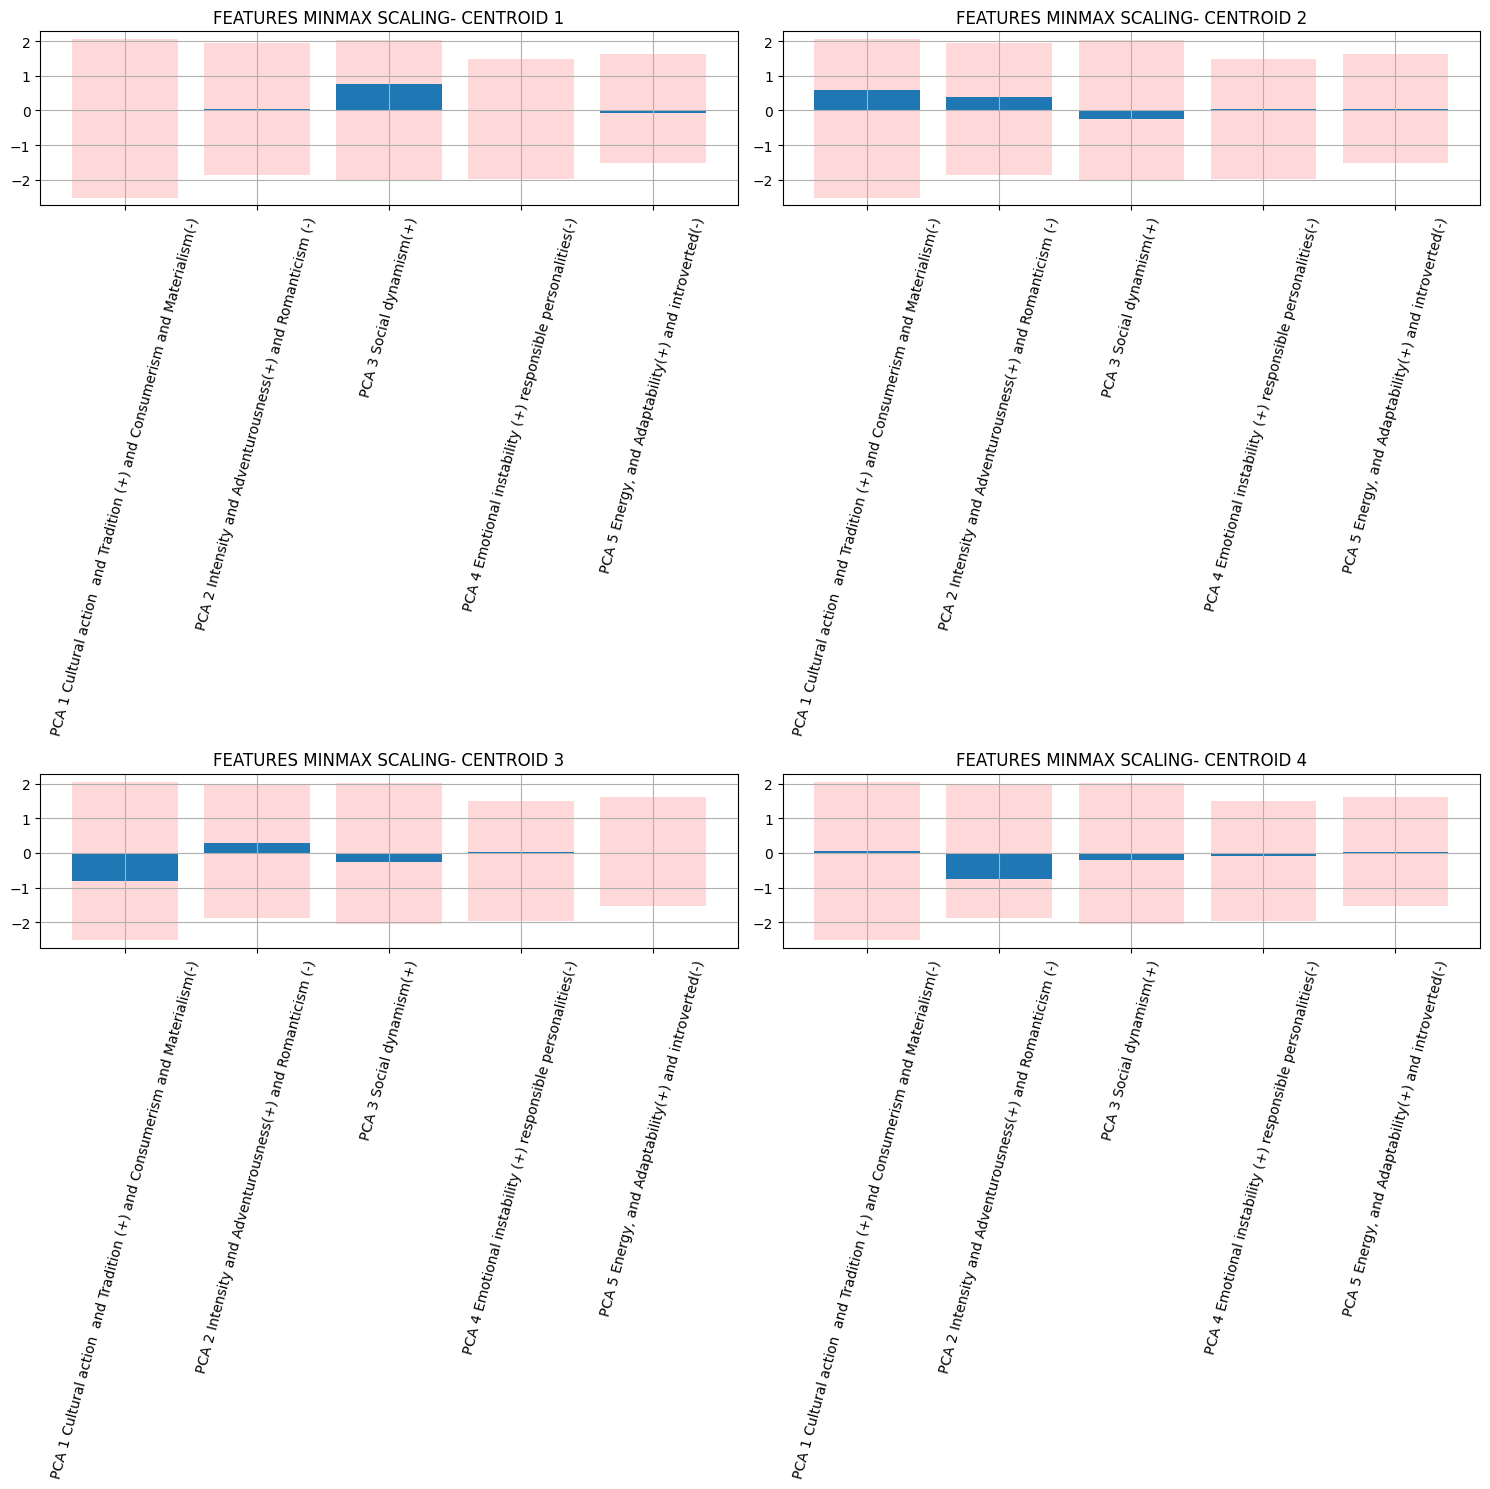

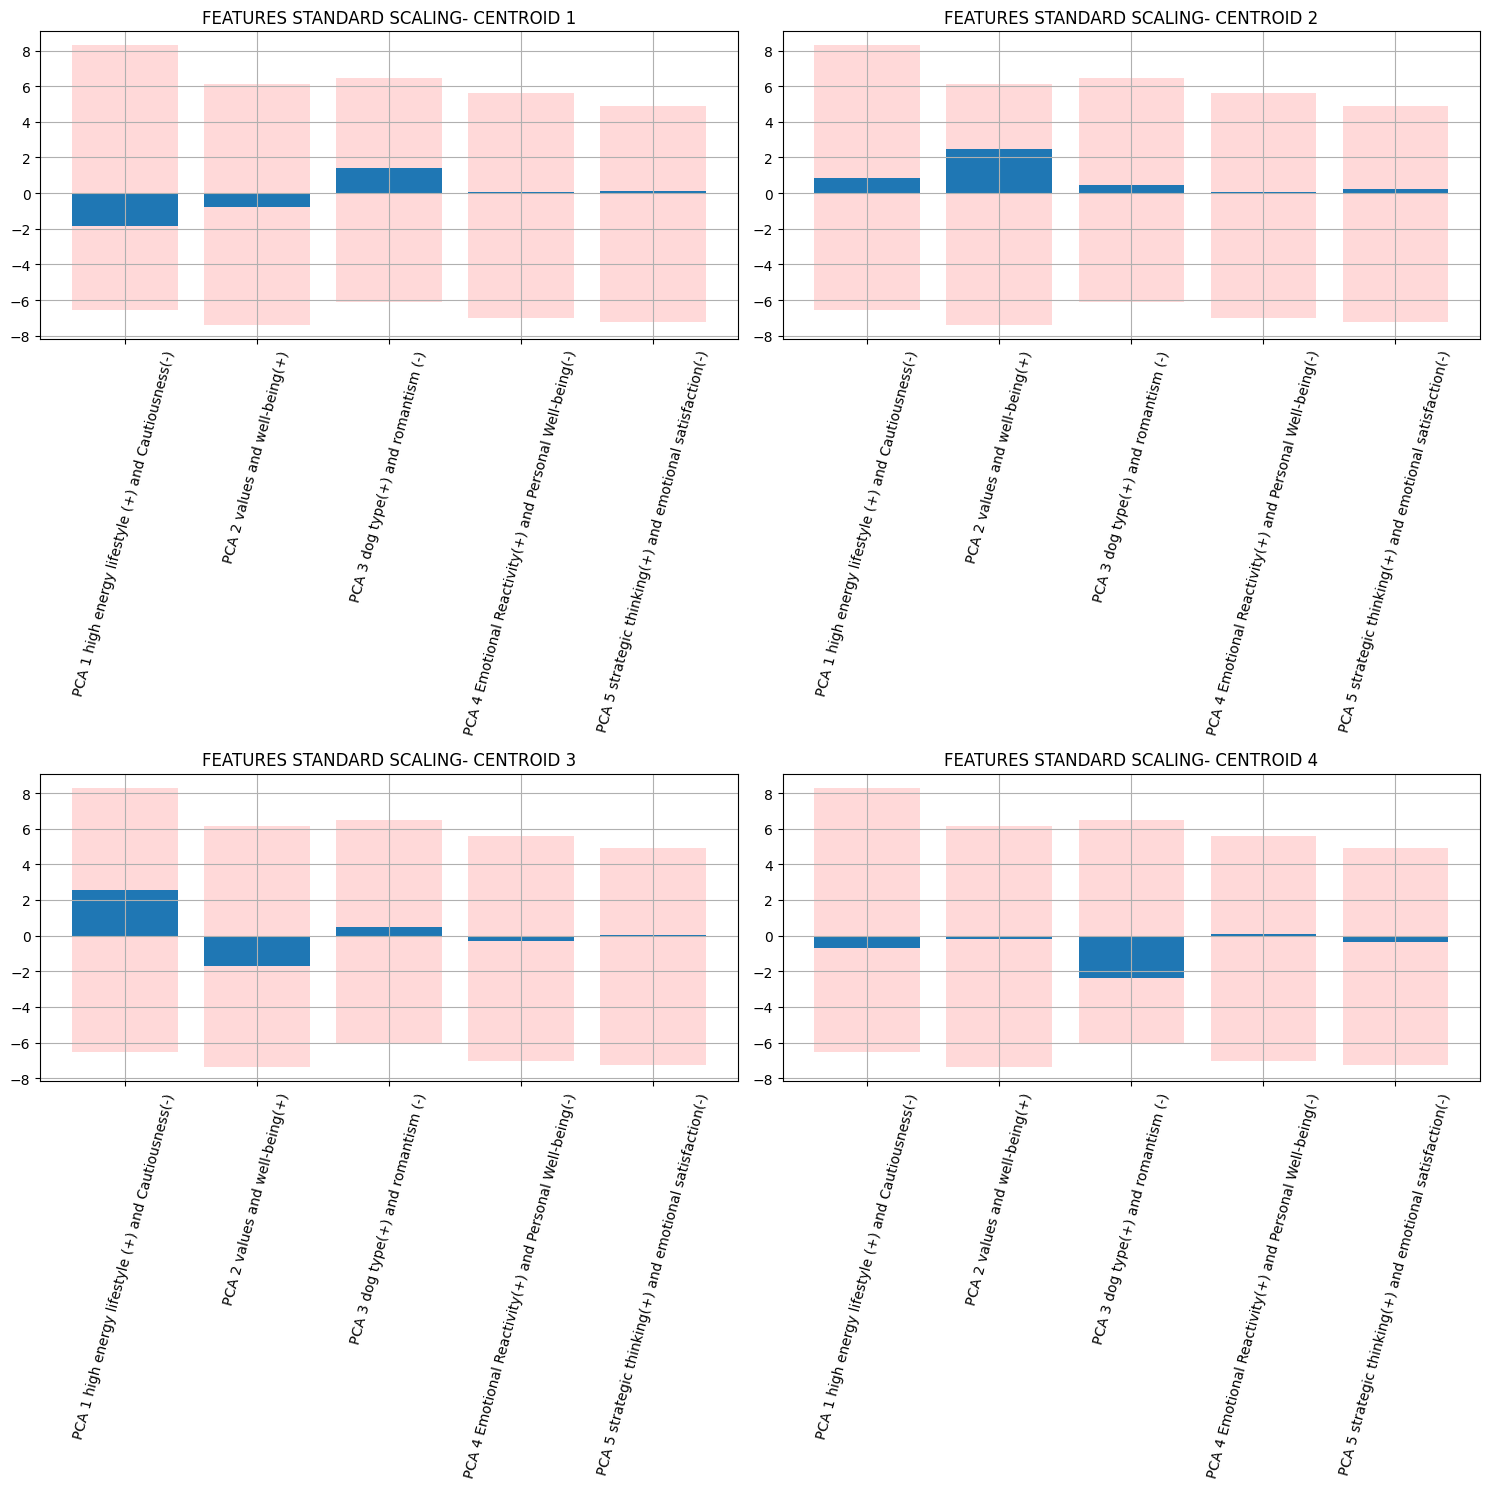

In [34]:
# **************************************
# CLUSTER CENTROIDS FOR MINMAX SCALING
# **************************************

# computation of the max/min values for every PC
maxs_y = Xa_df.max(axis=0)
mins_y = Xa_df.min(axis=0)

layout_map = [(0, 0), (0, 1), (1, 0), (1, 1)]
fig_centr, ax_centr = plt.subplots(2, 2, figsize=(15, 15))
for ii in range(best_k_mm):
    row_i,row_c = layout_map[ii]

    # Bar plots for max, min, and centroids
    ax_centr[row_i,row_c].bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_y, color='red', alpha=0.15)
    ax_centr[row_i,row_c].bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_y, color='red', alpha=0.15)
    ax_centr[row_i,row_c].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :], label="Centroid")

    # Set x-ticks and labels dynamically
    ax_centr[row_i,row_c].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
    ax_centr[row_i,row_c].set_xticklabels(labels=PC_names_mm[:km_mm.cluster_centers_.shape[1]], rotation=75)

    # Customize grid and title
    ax_centr[row_i,row_c].grid(visible=True, which='both')
    ax_centr[row_i,row_c].set_title(f'FEATURES MINMAX SCALING- CENTROID {ii+1}')
plt.tight_layout()

# **************************************
# CLUSTER CENTROIDS FOR STANDARD SCALING
# **************************************


maxs_y = Xb_df.max(axis=0)
mins_y = Xb_df.min(axis=0)

layout_map = [(0, 0), (0, 1), (1, 0), (1, 1)]
fig_centr, ax_centr = plt.subplots(2, 2, figsize=(15, 15))
for ii in range(best_k_std):
    row_i,row_c = layout_map[ii]

    ax_centr[row_i,row_c].bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_y, color='red', alpha=0.15)
    ax_centr[row_i,row_c].bar(np.arange(km_std.cluster_centers_.shape[1]), mins_y, color='red', alpha=0.15)
    ax_centr[row_i,row_c].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :], label="Centroid")

    ax_centr[row_i,row_c].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_centr[row_i,row_c].set_xticklabels(labels=PC_names_std[:km_std.cluster_centers_.shape[1]], rotation=75)

    ax_centr[row_i,row_c].grid(visible=True, which='both')
    ax_centr[row_i,row_c].set_title(f'FEATURES STANDARD SCALING- CENTROID {ii+1}')
plt.tight_layout()


### Cluster Analysis:
##### ----- MINMAX CASE -----
Cluster 1: The most dominant feature for this cluster is PC3 (Social Dynamism), which suggests that these individuals are highly sociable and outgoing. This aligns with traits often associated with the younger generation, who has more social connections and active lifestyles.

Cluster 2: This cluster is less explicitly defined compared to the first, but PC1 (Cultural Action and Tradition) plays a significant role. This indicates that the cultural values and adventurousness, which might correspond to individuals in their middle age, balancing tradition with exploration and growth.

Cluster 3: A strong influence of PC1 (Consumerism and Materialism) is observed in this cluster, suggesting a focus on financial success and spending habits. This group could represent individuals who are career-driven and motivated by material gains.

Cluster 4: Emotional tendencies dominate this cluster, as highlighted by PC4 (Emotional Instability and Romanticism). This may point to individuals who are more emotionally expressive and value romantic connections, traits that might be more common among women in the context of relationships.

##### ----- STANDARD CASE -----
Cluster 1: In this cluster, PCA1 (High Energy Lifestyle and Cautiousness) and PCA3 (Dog Type and Romanticism) play significant roles. The combination of strong decision-making abilities and lower romantic tendencies may suggest a connection to higher education levels, where individuals may prioritize rationality and practicality over emotional or romantic considerations.

Cluster 2: The defining feature for this cluster is PCA2 (Values and Well-being), indicating the importance of empathy and personal growth. It can be said that individuals in this group may have developed an empathy influenced by factors such as having siblings which enhances their ability to connect with others and value well-being.

Cluster 3: This cluster is strongly influenced by PCA1 (High Energy Lifestyle and Cautiousness), suggesting that energy levels and an active lifestyle play a dominant role. This may correlate with age, as younger individuals often shows higher energy and dynamism compared to older groups.

Cluster 4: The interpretation for this cluster aligns closely with the MinMax Cluster 4 case, where emotional and romantic tendencies are more pronounced. This cluster may represent emotionally driven individuals, possibly with stronger romantic or sentimental characteristics like females.

In [35]:
Cluster_names_mm = ['Energetic and socaial adventurers',
                 'Almost middle aged people',
                 'Money dependent individuals',
                 'Romantic people']

Cluster_names_std = ['Educated People',
                 'Sympathetic human',
                 'Energetic individuals',
                 'Romantic people']


## Exercise 5. Cluster Evaluations

In the cells below, following operations are done:
1. For each one of the two datasets (_std_ and _mm_), performed an **external evaluation** of the clustering obtained at step 4.1 with respect to one or more labels in the list _labels_. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. 

## EXTERNAL EVALUATION

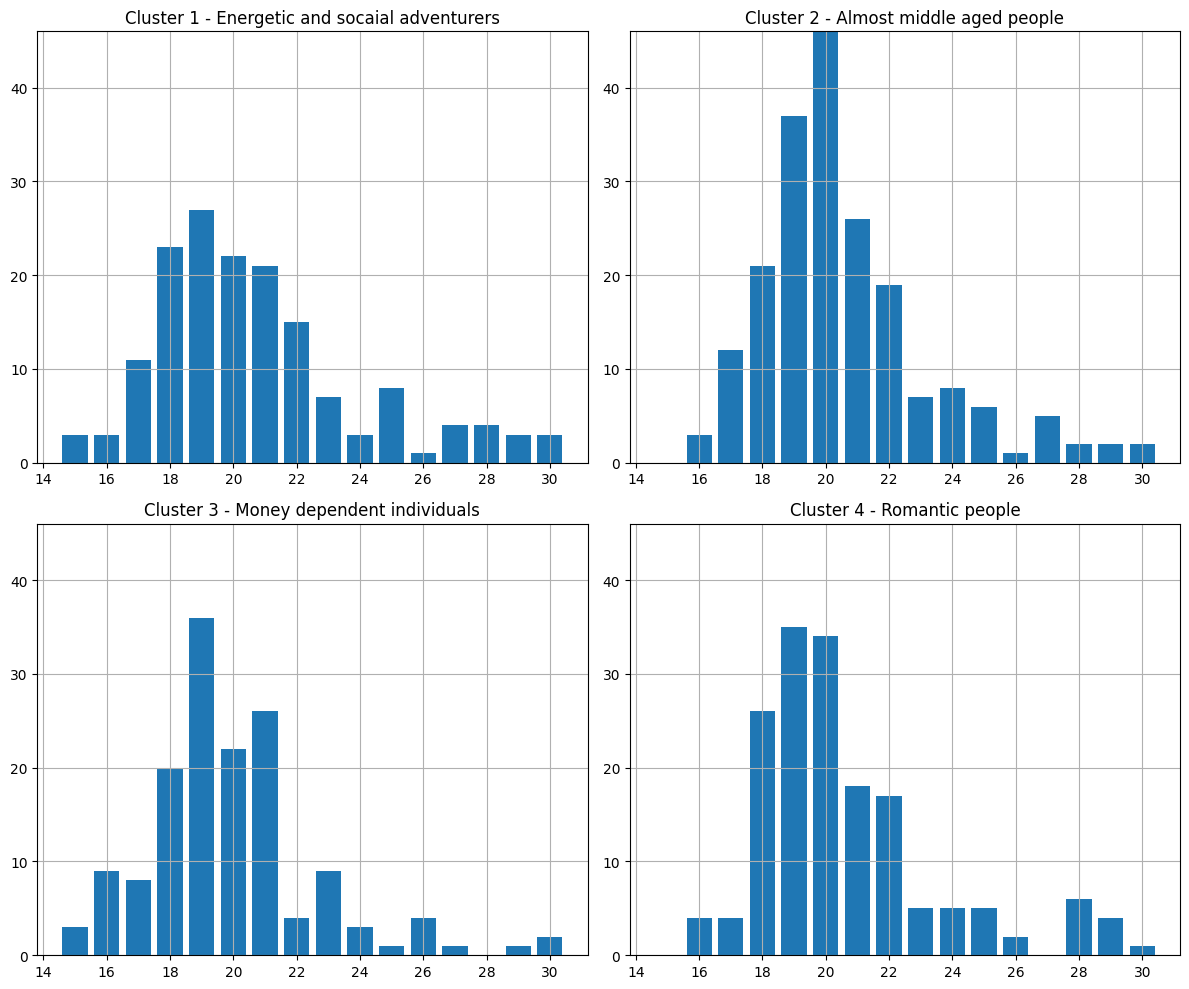

In [36]:
#----------------- MIN MAX SCALING ------------------
mask_clusters = [km_mm.labels_ == ii for ii in range(best_k_mm)]
cluster_analysis = [dict(df.loc[mask_clusters[ii], 'Age'].value_counts()) for ii in range(best_k_mm)]  # This analysis can be adjusted according to what you try to investigate. In this case it is an age analysis

labels = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]   # Don't forgat to change also the labels
maxcount = np.max([max(cluster_analysis[kk].values()) for kk in range(best_k_mm)])

fig_ext, ax_ext = plt.subplots(2, 2, figsize=(12, 10))
for ii in range(best_k_mm):
    row_indx = ii // 2
    col_indx = ii % 2
    ax_ext[row_indx, col_indx].bar(labels, [cluster_analysis[ii].get(ll, 0) for ll in labels])
    ax_ext[row_indx, col_indx].set_ylim(0, maxcount)
    ax_ext[row_indx, col_indx].grid(visible=True, which='both')
    ax_ext[row_indx, col_indx].set_title(f'Cluster {ii + 1} - {Cluster_names_mm[ii]}')
    plt.tight_layout()

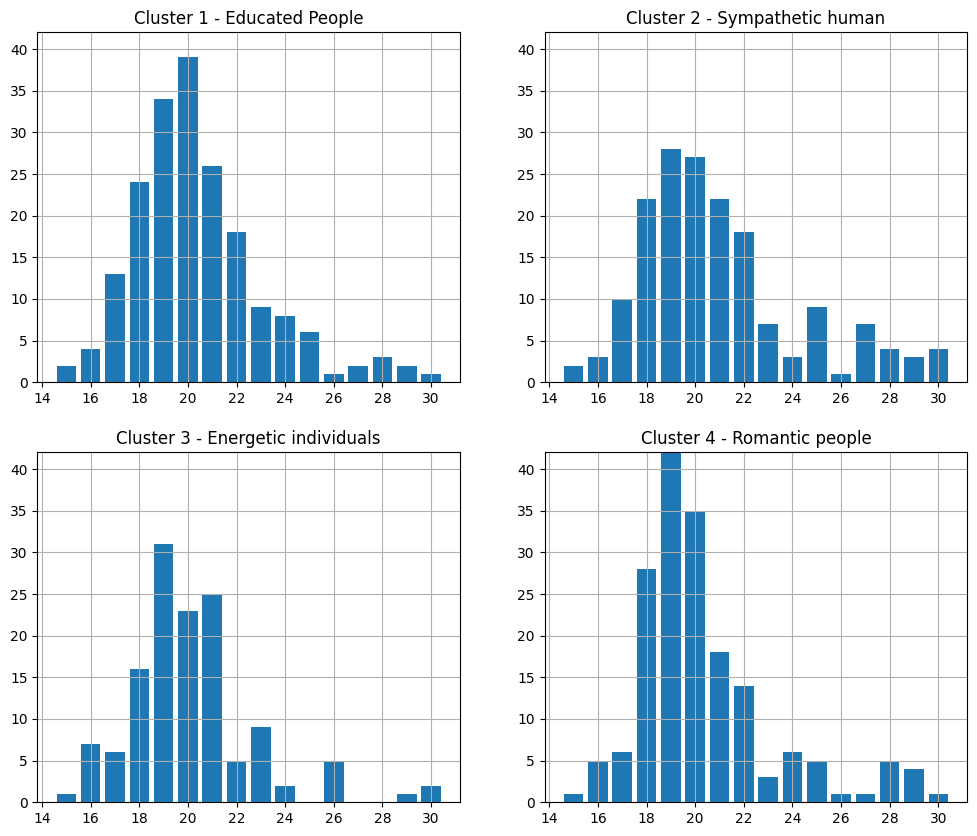

In [37]:
#----------------- STANDARD SCALING ------------------
mask_clusters = [km_std.labels_ == ii for ii in range(best_k_std)]
cluster_genpos = [dict(df.loc[mask_clusters[ii], 'Age'].value_counts()) for ii in range(best_k_std)]

labels = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
maxcount = np.max([max(cluster_genpos[kk].values()) for kk in range(best_k_std)])

fig_centroids_ext, ax_centr_ext = plt.subplots(2, 2, figsize=(12, 10))
for ii in range(best_k_std):
    row_indx = ii // 2
    col_indx= ii % 2
    ax_centr_ext[row_indx, col_indx].bar(labels, [cluster_genpos[ii].get(ll, 0) for ll in labels] )
    ax_centr_ext[row_indx, col_indx].set_ylim(0, maxcount)
    ax_centr_ext[row_indx, col_indx].grid(visible=True, which='both' )
    ax_centr_ext[row_indx, col_indx].set_title(f'Cluster {ii + 1} - {Cluster_names_std[ii]}')

## -------- (MinMax) External Evaluation --------
The initial interpretation of the cluster 1 aligns well with the bar graph, which indicates that younger individuals tend to show higher energy levels. On the other hand, the analysis(Cluster 2) regarding middle-aged individuals having a higher representation appears to be incorrect, as the data does not support this expectation. A revised interpretation is needed to accurately reflect the observed trends.
for the 3rd cluster, the analysis of this cluster appears accurate, particularly regarding the emphasis on the value placed on money. The data highlights a significant peak in this behavior among individuals aged 19-21, which seems both reasonable and consistent with social norms for this age group.
The interpretation for the last cluster(4) remains highly accurate. It demonstrates that emotional and romantic tendencies are observed among females, aligning with the data and confirming the validity of the initial analysis.


## -------- (Standard) External Evaluation --------
Cluster 1: The external evaluation reveals that our initial assumptions for this cluster were not accurate. It was expected that individuals with higher education levels would show higher ratios in the bar plots, but this is not the case, it is needed to revise the interpretation.

Cluster 2: The evaluation for this cluster appears correct. It aligns with the assumption that having siblings fosters more empathetic and sympathetic behavior, as supported by the data.

Cluster 3: This cluster is strongly associated with age. The bar graphs clearly illustrate that individuals aged 19, 20, and 21 exhibit significantly higher energy levels compared to other age groups, validating the analysis.

Cluster 4: The interpretation for this cluster mirrors the assumption made for the Min-Max scaled data. The findings remain consistent, reinforcing the initial analysis.

## INTERNAL EVALUATION

In [38]:
print(' ---------- silhouette Score of Each Cluster for MINMAX Case ---------')

silscores = silhouette_samples(Xa_df, km_mm.labels_)
cluster_silscores = [np.mean(silscores[km_mm.labels_ == kk]) for kk in range(best_k_mm)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(sil_list)]), index = Cluster_names_mm + ['Global'], columns=['Silhouette Score']))


print(' ---------- silhouette Score of Each Cluster for STANDARD Case --------')

silscores = silhouette_samples(Xb_df, km_std.labels_)
cluster_silscores = [np.mean(silscores[km_std.labels_ == kk]) for kk in range(best_k_std)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(sil_list)]), index = Cluster_names_std + ['Global'], columns=['Silhouette Score']))

 ---------- silhouette Score of Each Cluster for MINMAX Case ---------


Silhouette Score
Energetic and socaial adventurers          0.163168
Almost middle aged people                  0.164817
Money dependent individuals                0.141650
Romantic people                            0.172577
Global                                     0.157726

 ---------- silhouette Score of Each Cluster for STANDARD Case --------


Silhouette Score
Educated People                0.170124
Sympathetic human              0.161940
Energetic individuals          0.148207
Romantic people                0.147315
Global                         0.157726

The Romantic People cluster consistently has strong cohesion in the MinMax case but weaker performance in the Standard case, suggesting the scaling method impacts how this cluster is defined.
The Money-Dependent Individuals and Energetic Individuals clusters have relatively low silhouette scores in both cases, implying that these groups might require better feature representation or adjustment of clustering parameters.
The Global Score indicates that the clustering is reasonable but not highly distinct, as the scores are below 0.2. Additional refinement or feature engineering might improve overall performance.

